# Surprise Housing's Price Prediction Model Development

##### Done By

Name: **Arunkumar Gunasekaran**

Batch: **ML C57**  Assignment: **Advanced Regression Assignment**

Email: manigunasekaran30@gmail.com

# Advanced Regression Assignment

## Table of Contents
1. [Problem Statement](#Problem-Statement)
   - [Business Objective](#Business-Objective)
2. [Importing Necessary Modules](#Importing-Necessary-Modules)
3. [Data Understanding](#Data-Understanding)
   - [Loading Data from the CSV](#Loading-Data-from-the-CSV)
   - [Understanding Structure of dataset](#Understanding-Structure-of-dataset)
   - [Data Quality checks](#Data-Quality-checks)
4. [Data Cleaning](#Data-Cleaning)
    - [Fixing Null Values](#Fixing-Null-Values)
    - [Fixing Data Types and Deriving new Fields](#Fixing-Data-Types-and-Deriving-new-Fields)
    - [Droping irrelevant columns](#Droping-irrelevant-columns)
5. [Data Exploration](#Data-Exploration)
6. [Data Preparion](#Data-Exploration)
    - [Creating Dummy Variables](#Creating-Dummy-Variables)
    - [Test Train Split](#Test-Train-Split)
    - [Scaling features](#Scaling-features)
    - [Test Data Prepartion](#Test-Data-Prepartion)
7. [Model Building](#Model-Building)
    - [Simple Linear Fit and Co-efficient Calculation](#Simple-Linear-Fit-and-Co-efficient-Calculation)
    - [Ridge Regression](#Ridge-Regression)
    - [Lasso Regression](#Lasso-Regression)
8. [Model Evaluation](#Model-Evaluation)
     - [Metric Comparison](#Metric-Comparison)
     - [Model co-efficients Comparison](#Model-co-efficients-Comparison)
     - [Ridge Top Predictors](#Ridge-Top-Predictors)
     - [Lasso Top Predictors](#Lasso-Top-Predictors)
     - [Lasso Traning Dataset residual Analysis](#Lasso-Traning-Dataset-residual-Analysis)
     - [Lasso Test Dataset residual Analysis](#Lasso-Test-Dataset-residual-Analysis)
9. [Conclusion](#Conclusion)


## Problem Statement

Surprise Housing is a US-based housing company has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price

The company is looking at prospective properties to buy to enter the market.The company want a solution involving regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### Business Objective

 1. To Develop a model using regularization in order to predict SalePrice of the House
 2. To find which variables are significant in predicting SalesPrice of the House
 3. To Understand how exactly the prices vary with variables
    
So they can decide whether to invest or not into the property, Also they can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Importing Necessary Modules

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# For analysis and numerical functions
import numpy as np
import pandas as pd

# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

#For building model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

#For Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

## Data Understanding

### Loading Data from the CSV

In [2]:
#Loading house pricing data from CSV using pandas
df = pd.read_csv("train.csv")

### Understanding Structure of dataset

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# checking the shape of the dataframe
df.shape

(1460, 81)

<font color='green'>Observation</font> 
  1. 81 Cloumns and 1460 rows are present in dataset
  2. Pandas read NA as null in some of the catgorical columns (alley,fence,pool) where it actually meant something 
  3. 38 numerical variables(float64(3), int64(35)) and 43 catagorical variable in the dataset
  4. OverallQual, OverallCond as indetified as numerical But based on data description this are categorical
  5. YearBuilt: Original construction date, YearRemodAdd: Remodel date (same as construction date if no remodeling or additions), GarageYrBlt: Year garage was built, MoSold: Month Sold (MM), YrSold: Year Sold (YYYY) this are identified as the int need type cast to the dart part

### Data Quality checks

In [7]:
# Checking columns with missing percentage
print(100*df.isnull().mean().sort_values(0,ascending=False).head(25))

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Id               0.000000
Functional       0.000000
Fireplaces       0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
dtype: float64


In [8]:
# checking rows with missing percentage
100*df.isnull().mean(axis=1).sort_values(0,ascending=False).head(25)

39      18.518519
1011    18.518519
1218    18.518519
533     18.518519
1179    17.283951
705     17.283951
520     17.283951
1143    13.580247
1035    13.580247
1030    13.580247
342     13.580247
1321    13.580247
375     13.580247
287     13.580247
386     12.345679
646     12.345679
102     12.345679
1219    12.345679
1323    12.345679
1326    12.345679
1232    12.345679
125     12.345679
1283    12.345679
108     12.345679
1137    12.345679
dtype: float64

In [9]:
# checking for duplicate rows
df_duplicated = df[df.duplicated()]
print("number of duplicate rows: ", df_duplicated.shape)

number of duplicate rows:  (0, 81)


In [10]:
#checking for Cloumns with Constant and unique values
col_unique_count_df=df.nunique()
col_unique_count_df = pd.concat([col_unique_count_df, df.dtypes],axis = 1)
col_unique_count_df.sort_values(0,ascending=False).head(40)

,0,1
Id,1460,int64
LotArea,1073,int64
GrLivArea,861,int64
BsmtUnfSF,780,int64
1stFlrSF,753,int64
TotalBsmtSF,721,int64
SalePrice,663,int64
BsmtFinSF1,637,int64
GarageArea,441,int64
2ndFlrSF,417,int64


In [11]:
#checking for Cloumns with Constant and unique values
col_unique_count_df.sort_values(0,ascending=False).tail(41)

,0,1
SaleCondition,6,object
Heating,6,object
BsmtFinType2,6,object
BsmtFinType1,6,object
RoofStyle,6,object
Foundation,6,object
GarageQual,5,object
YrSold,5,int64
GarageCars,5,int64
GarageCond,5,object


<font color='green'>Observation</font>
1. There are Missing values at the rows and columns we need to treat this missing values
2. No duplicate rows
3. 1 unique column Id can be dropped

## Data Cleaning

### Fixing Null Values

In some of the Catgorical variable NA has business meaning None not actually a missing values

In [12]:
#replace null with meaningfull value on catagorical variable 
NA_Values_Map = {'Alley':'No alley access','BsmtQual':'No Basement','BsmtCond':'No Basement','BsmtExposure':'No Basement',
                'BsmtFinType1':'No Basement','BsmtFinType2':'No Basement','FireplaceQu':'No Fireplace',
                'GarageType':'No Garage','GarageFinish':'No Garage','GarageQual':'No Garage','GarageCond':'No Garage',
                'PoolQC':'No Pool','Fence':'No Fence','MiscFeature':'None'};
for column in NA_Values_Map.keys():
    df[column].fillna(NA_Values_Map.get(column),inplace=True)

In [13]:
# Checking columns with missing percentage
print(100*df.isnull().mean().sort_values(0,ascending=False).head(10))

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrType      0.547945
MasVnrArea      0.547945
Electrical      0.068493
KitchenQual     0.000000
GarageType      0.000000
FireplaceQu     0.000000
Fireplaces      0.000000
Functional      0.000000
dtype: float64


based on 10% rule when a column has missing more than 10% it likely to cause bias. So we can drop the LotFrontage  field and use missing value imputation for remaining

In [14]:
#droping LotFrontage due to lot of missing values
df.drop('LotFrontage', axis = 1, inplace = True)

In [15]:
#Missing value treatment for GarageYrBlt
#converting Year from int to object so it will consider as string
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)

In [16]:
#Missing value treatment for MasVnrType
#in data definition we can see that there is a specific value None
#so we can map null to None
df['MasVnrType'].fillna('None',inplace=True)      

In [17]:
#Missing value treatment for MasVnrArea
#replacing null with median
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)      

In [18]:
#Electrical having less than 0.1% there might 1 or two row missing let check and drop the rows
100*df.isnull().mean(axis=1).sort_values(0,ascending=False).head(10)

1379    1.25
969     0.00
978     0.00
977     0.00
976     0.00
975     0.00
974     0.00
973     0.00
972     0.00
971     0.00
dtype: float64

In [19]:
#droping row 1379
df.drop(1379,inplace=True)

In [20]:
#re-checking nulls on rows
100*df.isnull().mean(axis=1).sort_values(0,ascending=False).head(10)

0      0.0
980    0.0
978    0.0
977    0.0
976    0.0
975    0.0
974    0.0
973    0.0
972    0.0
971    0.0
dtype: float64

In [21]:
# re-checking columns with missing percentage
print(100*df.isnull().mean().sort_values(0,ascending=False).head(10))

Id              0.0
MSSubClass      0.0
GarageYrBlt     0.0
GarageType      0.0
FireplaceQu     0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
KitchenQual     0.0
KitchenAbvGr    0.0
dtype: float64


### Fixing Data Types and Deriving new Fields

1. OverallQual, OverallCond as indetified as numerical But based on data description this are categorical
2. YearBuilt, YearRemodAdd, GarageYrBlt,YrSold, MoSold this are identified as the int need type cast to the dart part

In [22]:

# Defining the map function for rating
def rating_map(x):
    return {10:"Very Excellent",9:"Excellent",8:"Very Good",7:"Good",6:"Above Average",
                 5:"Average",4:"Below Average",3:"Fair",2:"Poor",1:"Very Poor"}[x]
# Applying the map function to the OverallQual,OverallCond
df["OverallQual"] = df["OverallQual"].apply(rating_map)
df["OverallCond"] = df["OverallCond"].apply(rating_map)

In [23]:
#we can actually drop  YrSold and MoSold as this are avialable post sales
#May be we can use YrSold to calculate the age of building
df['BuildingAge'] =  df["YrSold"] - df["YearBuilt"]
df['GarageYrAge'] =  df["YrSold"] - df["GarageYrBlt"]
df['ModifiedLastedYrs'] =  df["YrSold"] -df["YearRemodAdd"]

we can drop the original year fields

### Droping irrelevant columns

In [24]:
#dropping unique column Id 
#droping original year fields and month sold
df.drop(['Id','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold'], axis = 1, inplace = True)

## Data Exploration

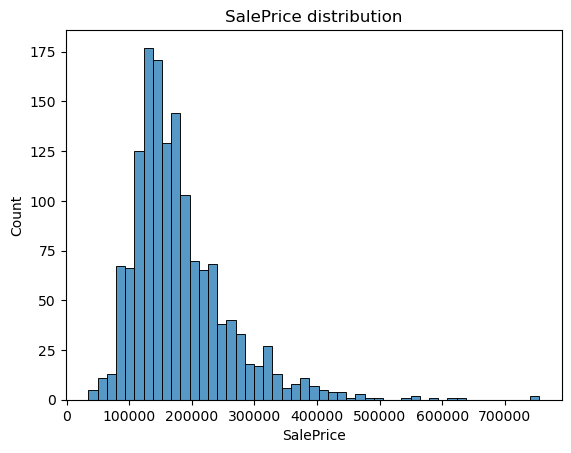

In [25]:
#ploting target varaible distribution  
sns.histplot(x=df["SalePrice"])
plt.title('SalePrice distribution')
plt.show()

in the above diagram we can see the data is having long tail on the right which mean it is positive skew

In [26]:
print("Skewness:", df["SalePrice"].skew())


Skewness: 1.8819429948035529


In [27]:
#As we can see it skewness is >0 it is positively skewed
#use log transformation to correct skewness
df["SalePrice"] =  np.log1p(df["SalePrice"])

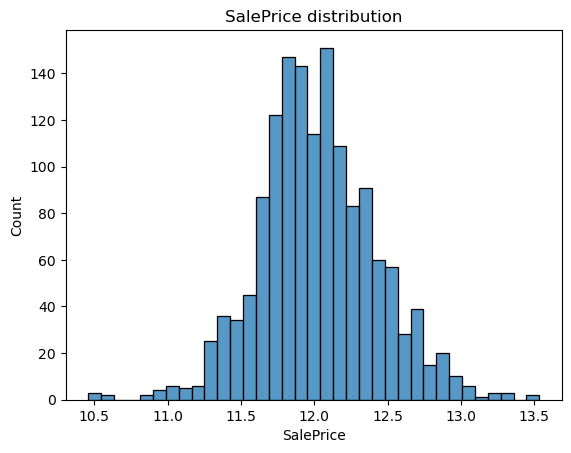

In [28]:
#re-checking the target variable distribution
sns.histplot(x=df["SalePrice"])
plt.title('SalePrice distribution')
plt.show()

In [29]:
#getting numerical and categorical variable for data exploration
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [30]:
print(numerical_columns.size)
numerical_columns

32


Index(['MSSubClass', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice', 'BuildingAge', 'GarageYrAge', 'ModifiedLastedYrs'],
      dtype='object')

In [31]:
#since there are lot numerical variables let's find the ones mostly correlated to SalePrice
top_correlations = df.corr()["SalePrice"].sort_values(0,ascending=False)
numerical_columns_filtered = top_correlations.head(15).index
top_correlations.head(15)

SalePrice       1.000000
GrLivArea       0.700942
GarageCars      0.680645
GarageArea      0.650916
TotalBsmtSF     0.612642
1stFlrSF        0.597219
FullBath        0.594892
TotRmsAbvGrd    0.534436
Fireplaces      0.489609
MasVnrArea      0.426828
BsmtFinSF1      0.372152
WoodDeckSF      0.334135
OpenPorchSF     0.321114
2ndFlrSF        0.319344
HalfBath        0.314135
Name: SalePrice, dtype: float64

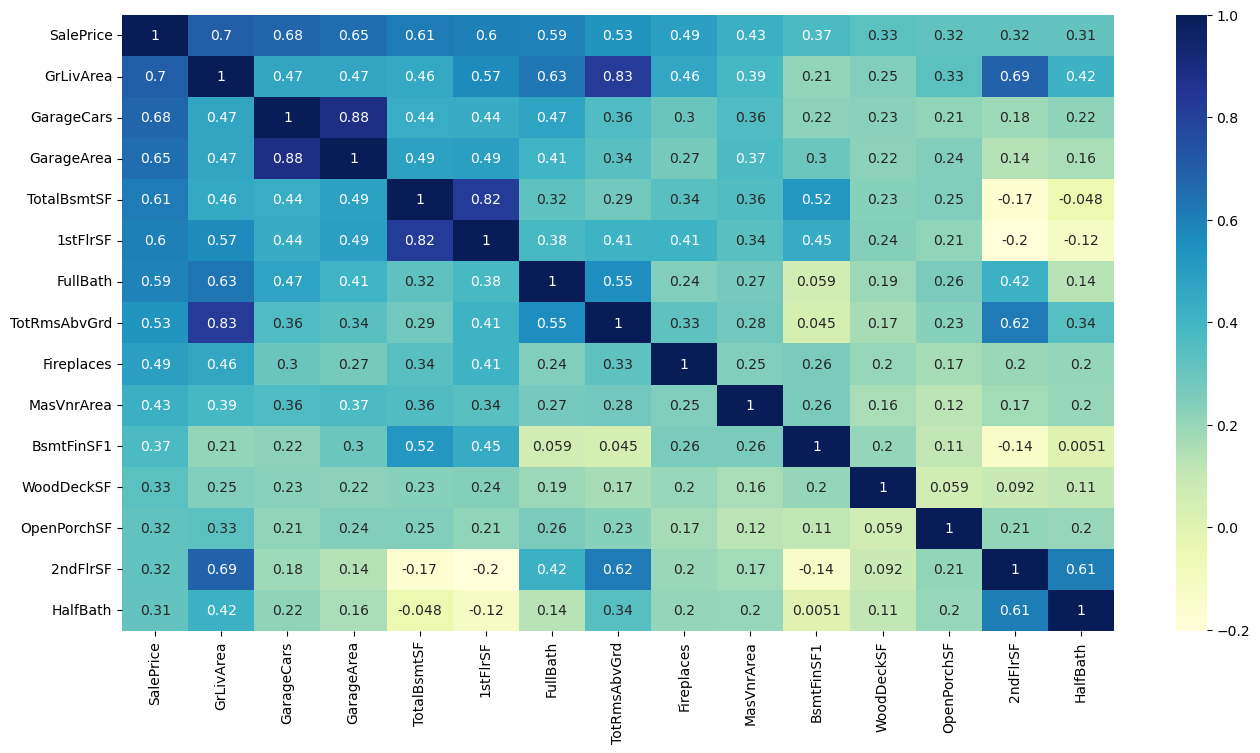

In [32]:
#plotting heat map to visualize the correlations
plt.figure(figsize=(16,8))
sns.heatmap(df[numerical_columns_filtered].corr(), cmap="YlGnBu", annot=True)
plt.show()

<font color="Green">Observation</font>
1. SalePrice is correlated with GrLivArea(0.70),GarageCars(0.68),GarageArea(0.65),TotalBsmtSF(0.61),1stFlrSF(0.59),  
    FullBath(0.59),TotRmsAbvGrd(0.53),Fireplaces(0.48),MasVnrArea(0.42)
2. GarageCars and GarangeArea are highly which makes sense (0.88)
3. TotalBsmtSF  and 1stFlrSF are highly which makes sense (0.82)
4. GrLivArea and TotRmsAbvGrd are highly which makes sense (0.83)   

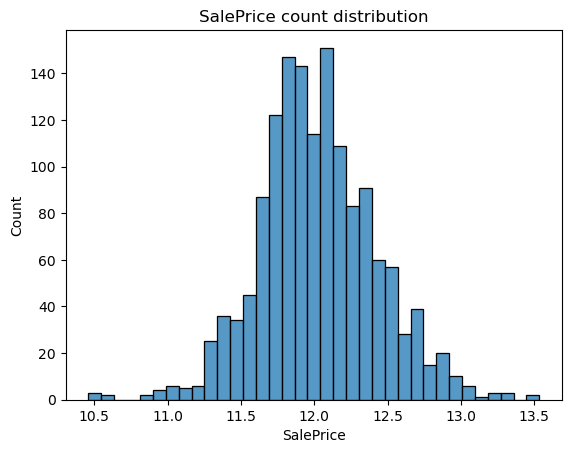

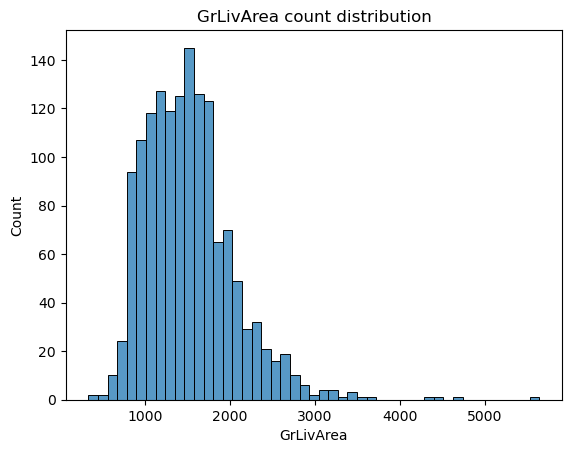

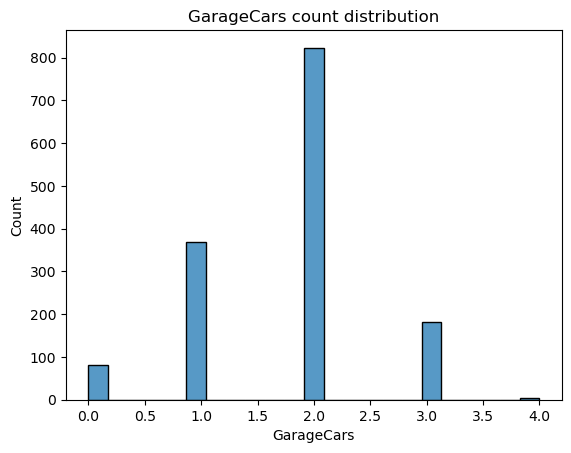

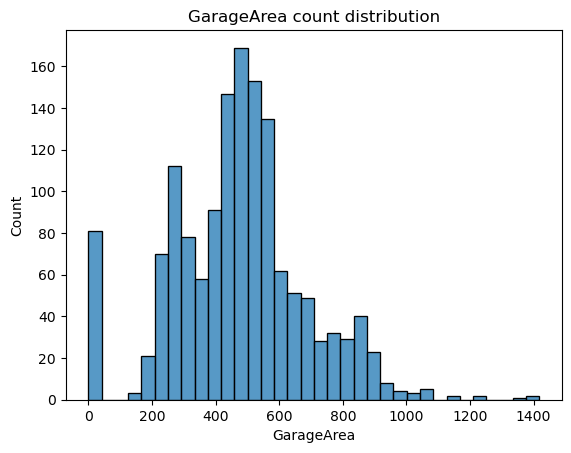

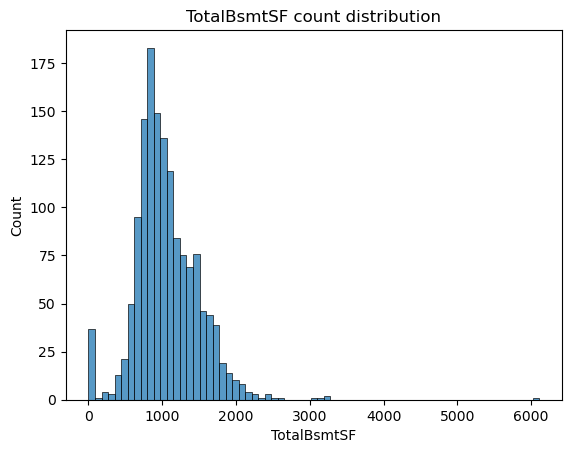

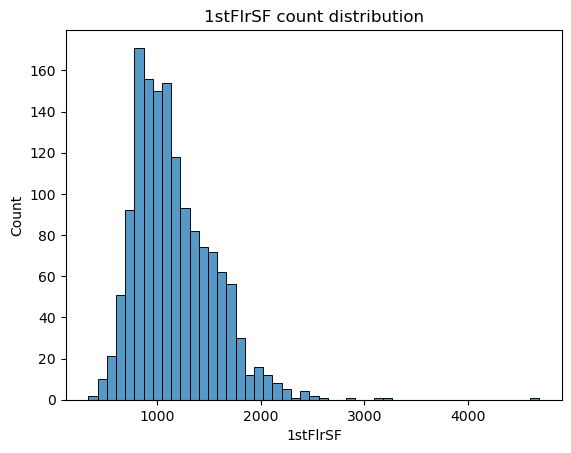

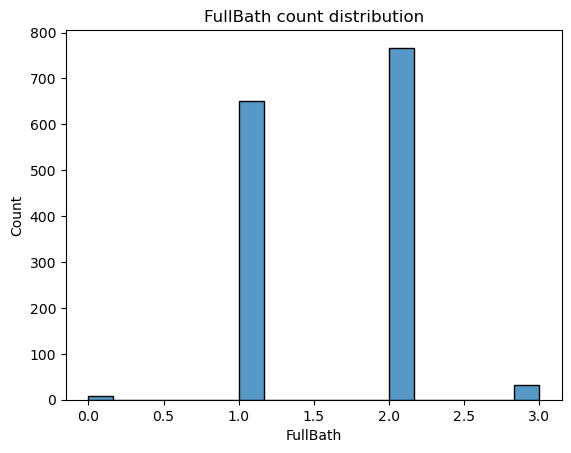

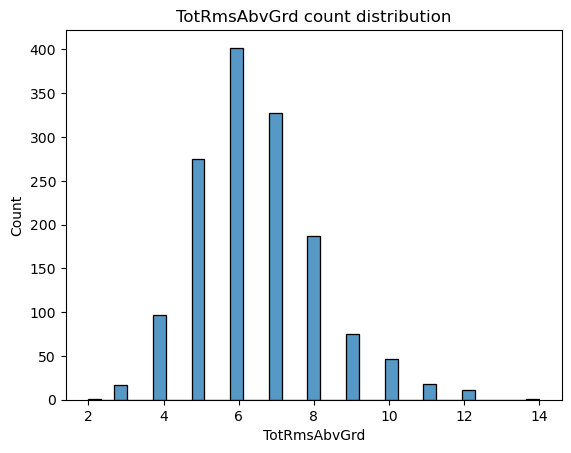

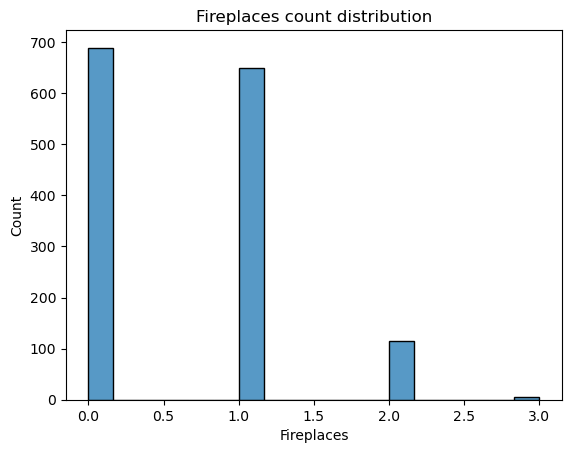

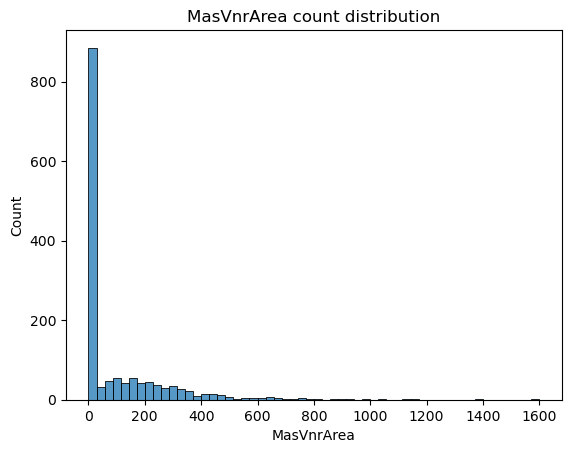

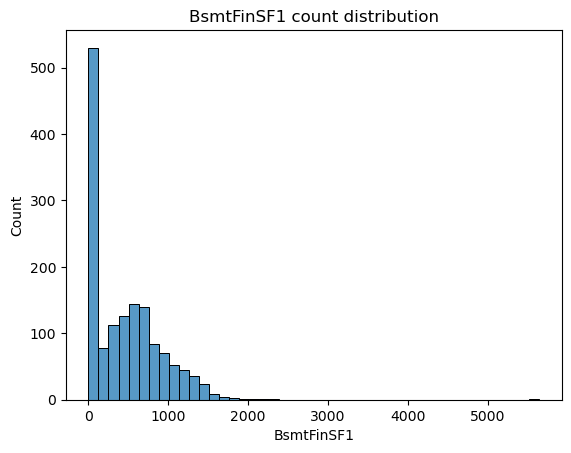

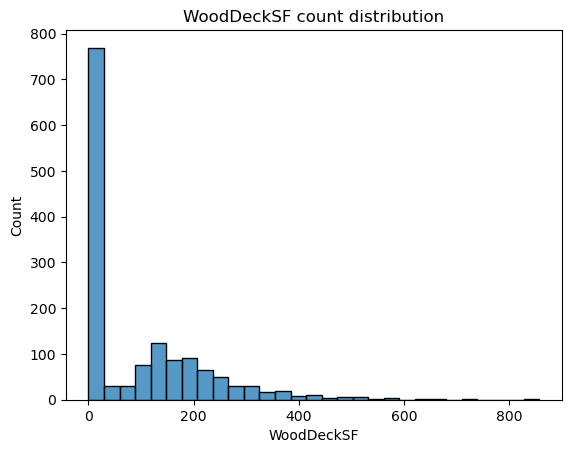

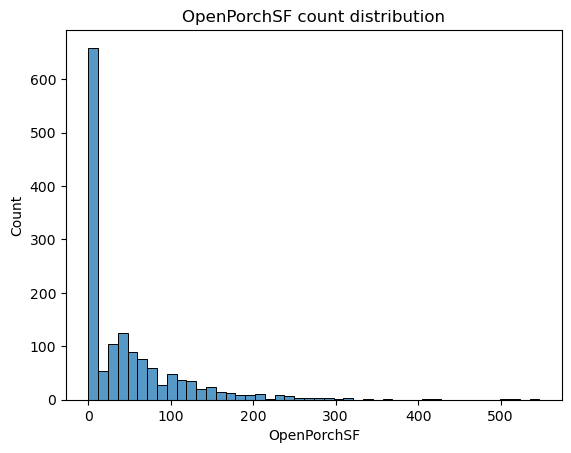

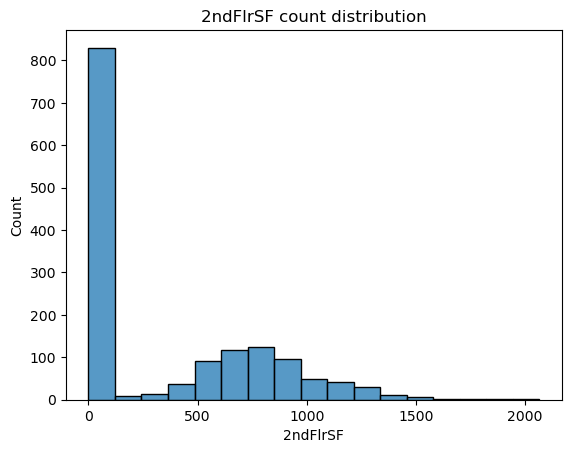

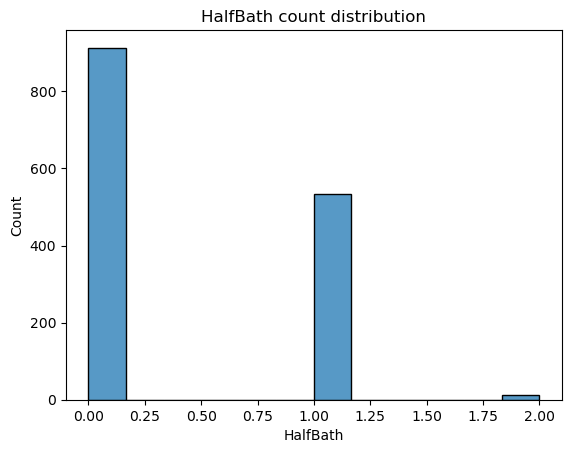

In [33]:
for column in numerical_columns_filtered:    
    sns.histplot(x=df[column])
    plt.title(column+ ' count distribution')
    plt.show()

<font color="Green">Observation</font>
1. Most House sold are having the living area and total basement are between 1000 to 2000 sq feet
2. Most house with garage equiped for 2 cars with 400 to 600 sq feet
3. Most House are equiped 1 or 2 full bathrooms

In [34]:
print(categorical_columns.size)
categorical_columns

45


Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [35]:
df['MSZoning'].value_counts()

RL         1150
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [36]:
df['Street'].value_counts()

Pave    1453
Grvl       6
Name: Street, dtype: int64

In [37]:
df['Street'].describe()

count     1459
unique       2
top       Pave
freq      1453
Name: Street, dtype: object

In [38]:
# in stree we can observe single value is occuring multiple times let's drop this kind of fields as it will not add much importance 
# using 95% threshold to drop
columns2Drop = []
for column in categorical_columns:
    des_res = df[column].describe()
    if(des_res['freq'] >(des_res['count']*0.95)):
        columns2Drop.append(column)
print(columns2Drop)
df.drop(columns2Drop, axis = 1, inplace = True)
       

['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC', 'MiscFeature']


In [39]:
# re-calculating categorical columns 
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

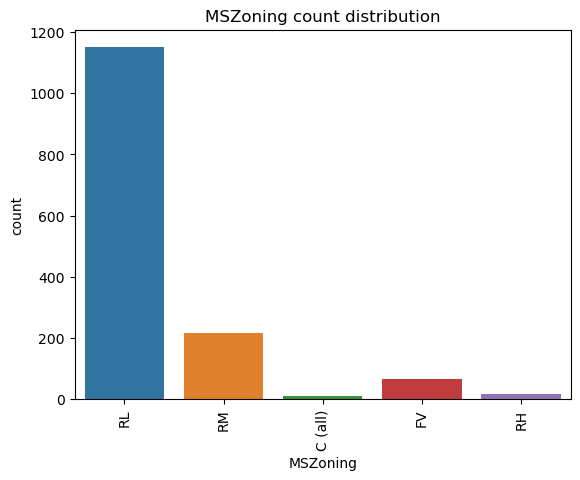

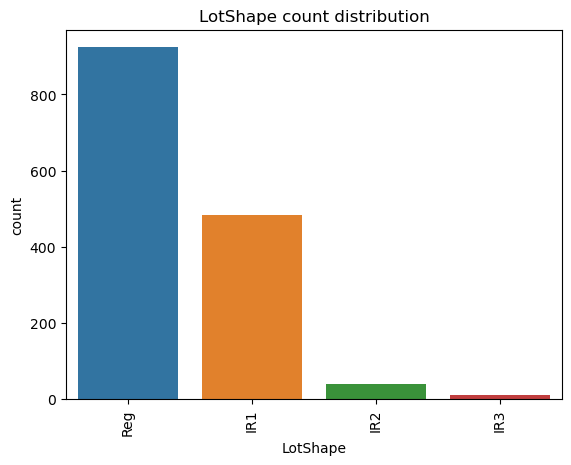

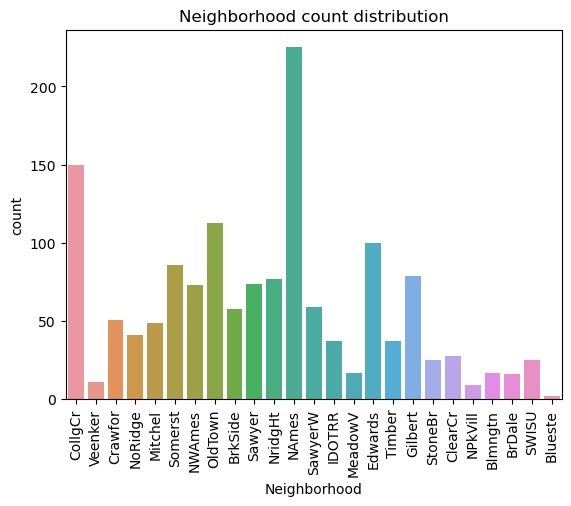

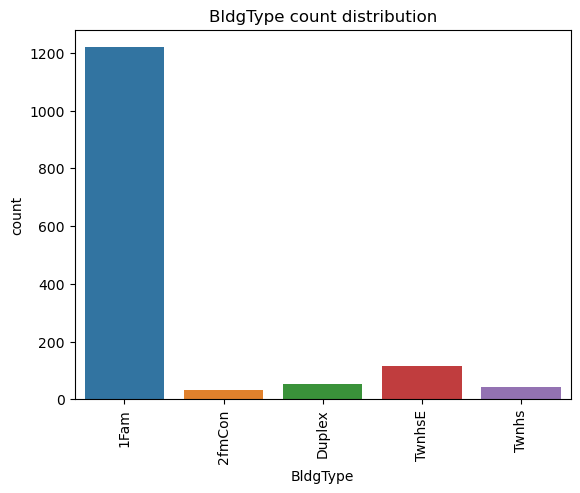

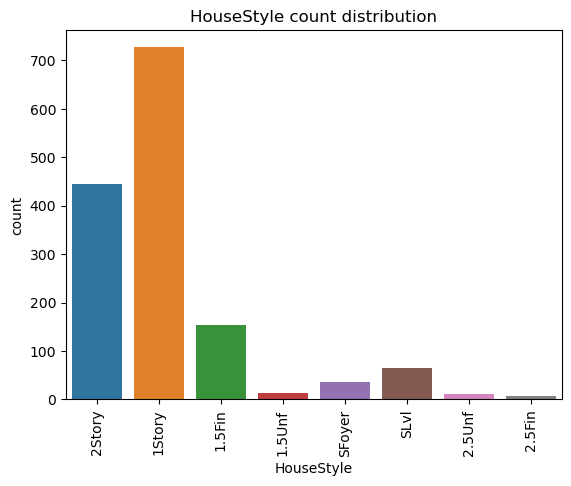

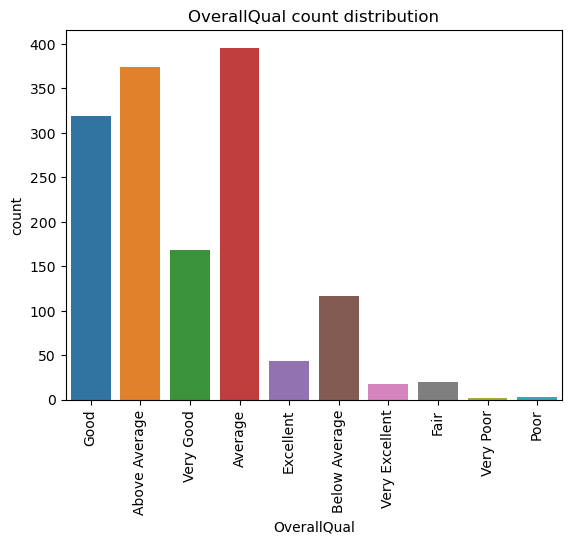

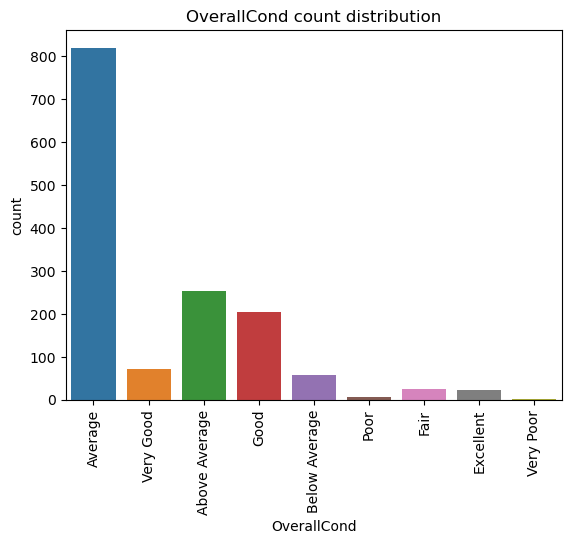

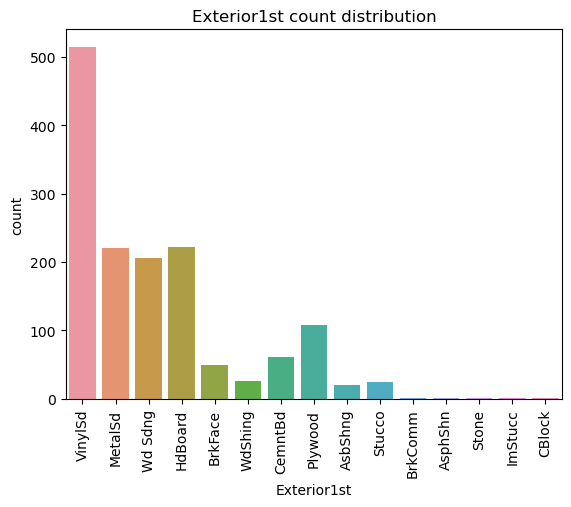

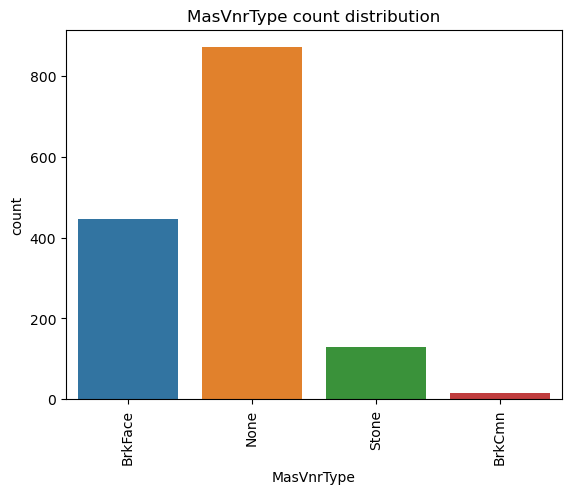

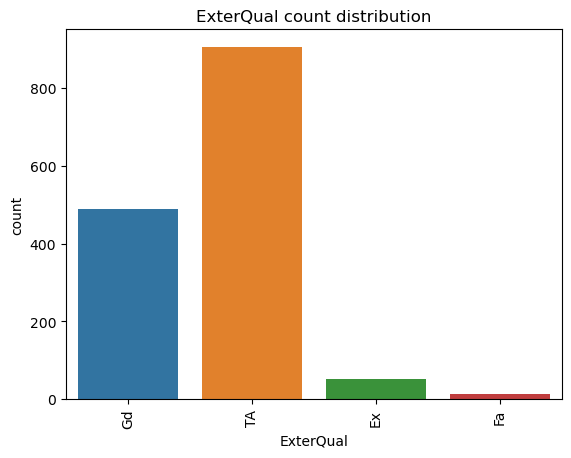

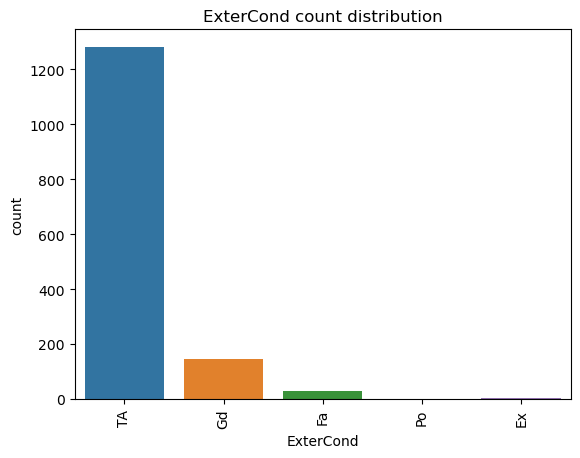

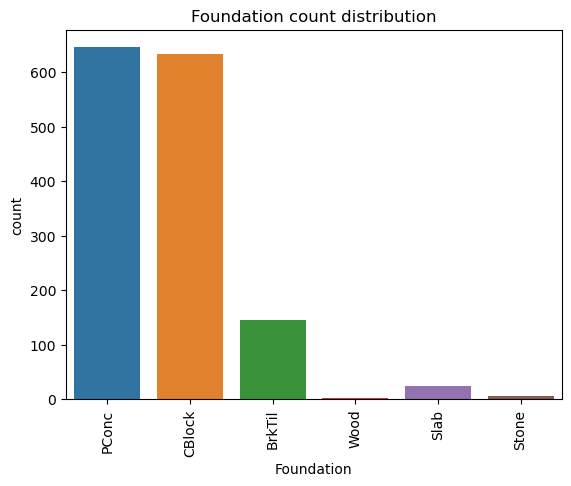

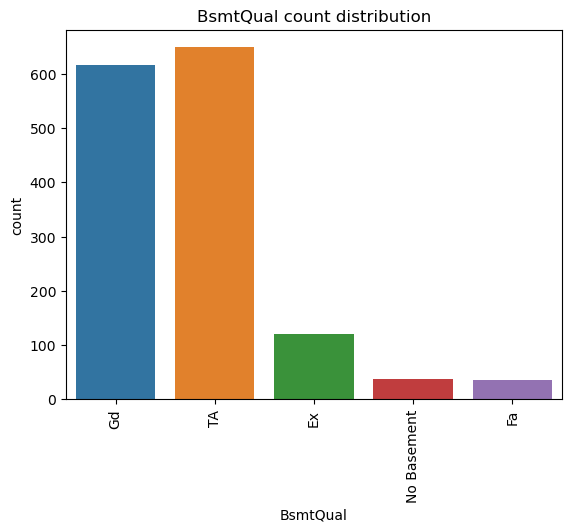

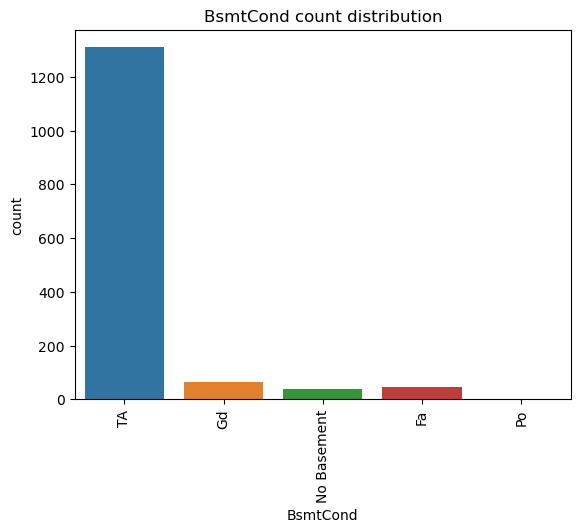

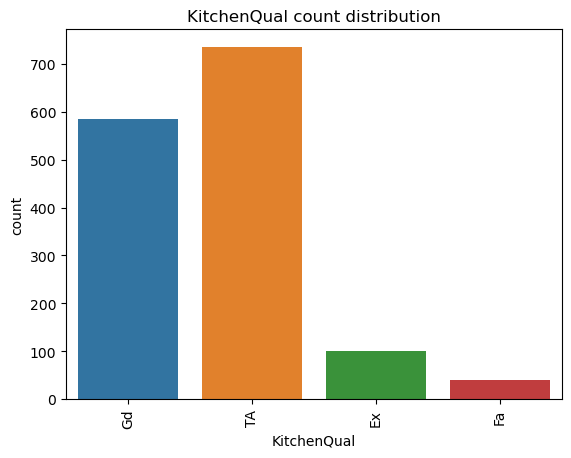

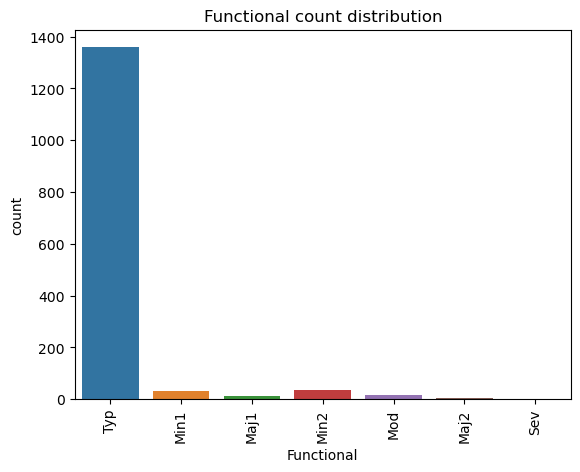

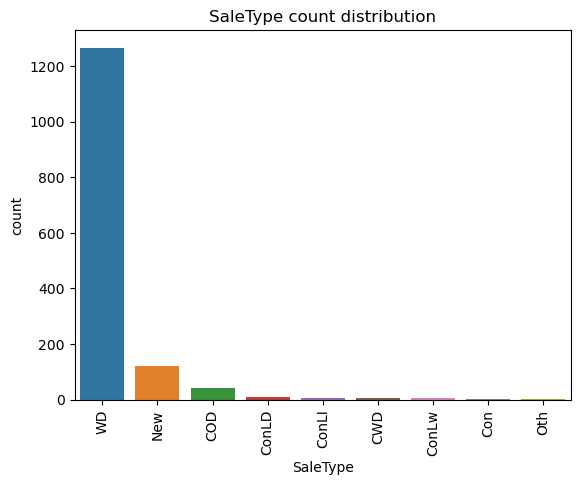

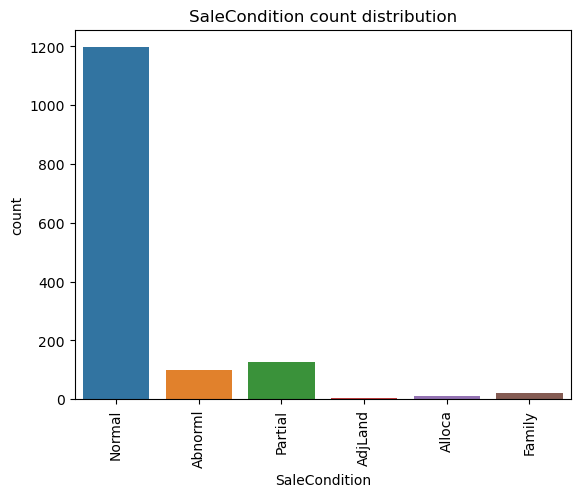

In [40]:
#taking feature of the house that generally affects the price and cheking its count distribution 
categorical_columns_filtered = ['MSZoning','LotShape','Neighborhood', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond','Exterior1st','MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond','KitchenQual', 'Functional', 'SaleType', 'SaleCondition']
for column in categorical_columns_filtered:
    sns.countplot(x=df[column])
    plt.title(column+ ' count distribution')
    plt.xticks(rotation=90)
    plt.show()

<font color="Green">Observation</font>
1. Most of the house sold are Residential Low Density
2. Most House Sold are in Names and CollgCr
3. Most house Sold are 1 story or 2 story house style
4. Most houses Sold are OverallCondition Average may be this could be due to cheap pricing option. 
5. May be it is good strategy for the company to focus on average category as they are sold more interms of demand perspective

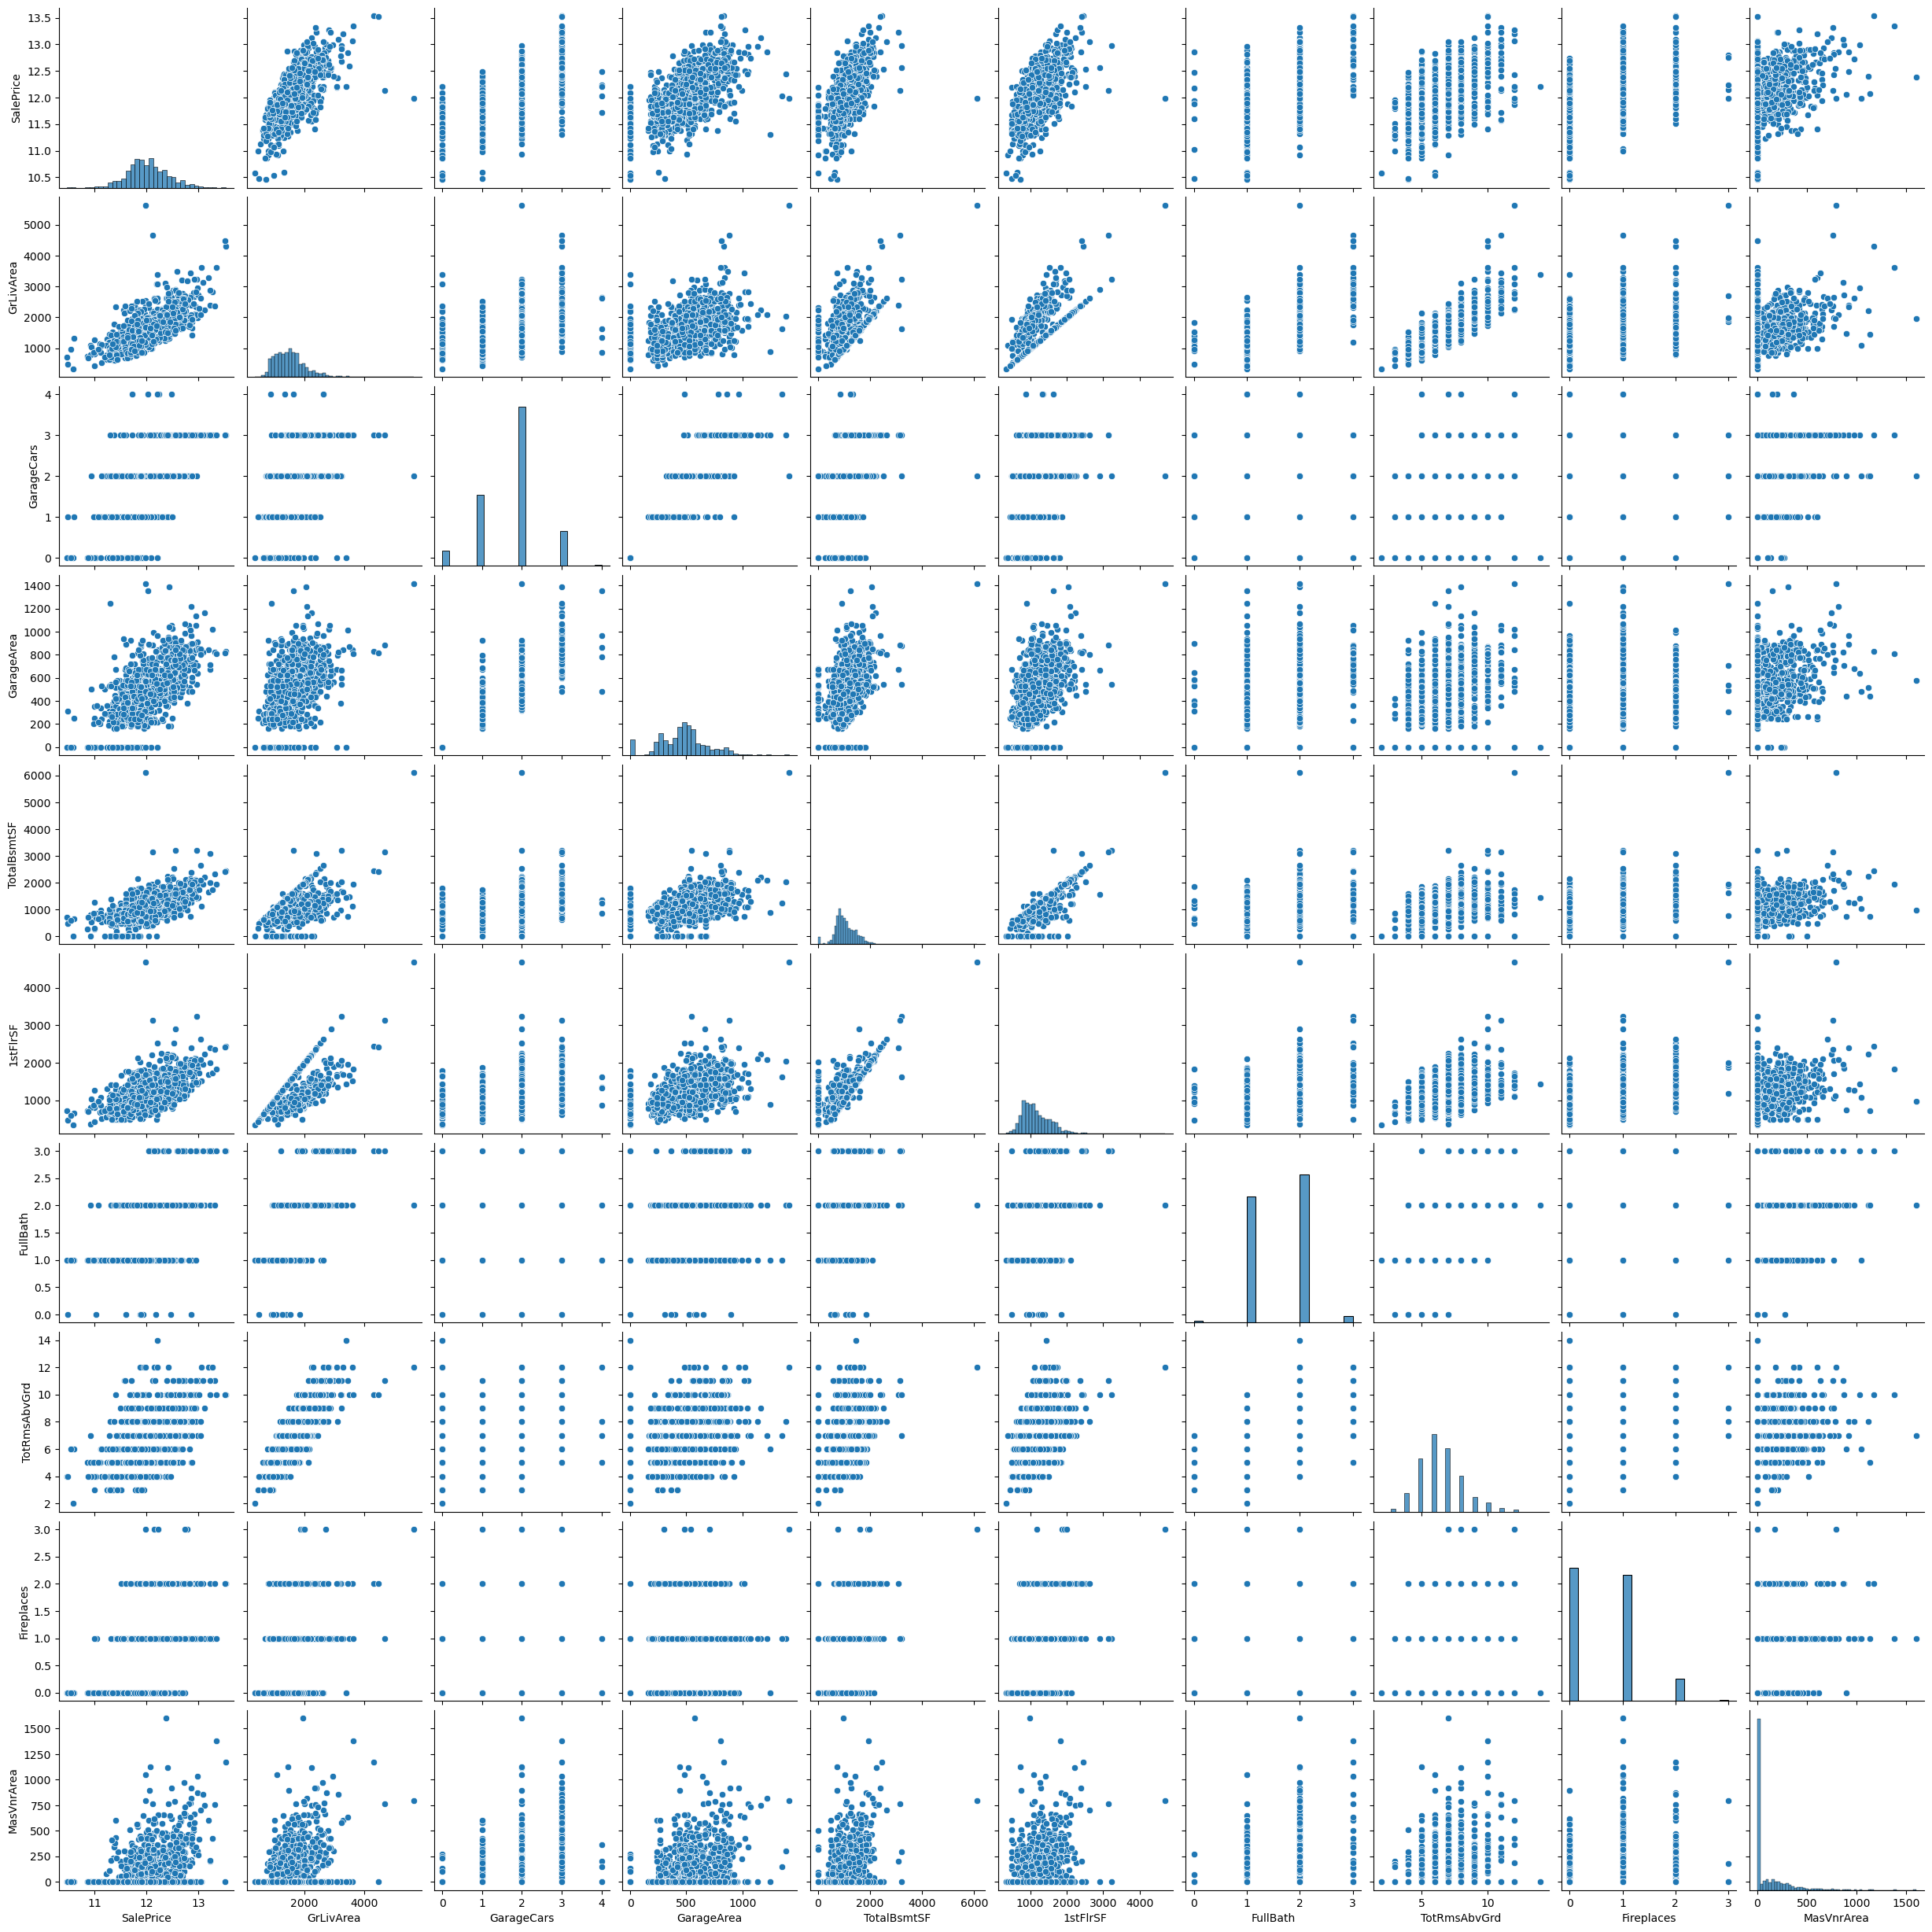

In [41]:
#creating pair plot for numerical values
sns.pairplot(df[numerical_columns_filtered[:10]])
plt.show()

<font color="Green">Observation</font>
1. In first row we can confirm SalePrice is correlattion with GrLivAreaGarageCars,GarageArea,TotalBsmtSF,1stFlrSF via scatter plot  

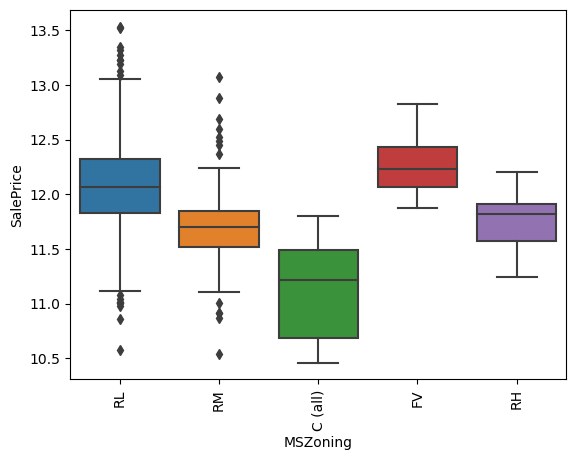

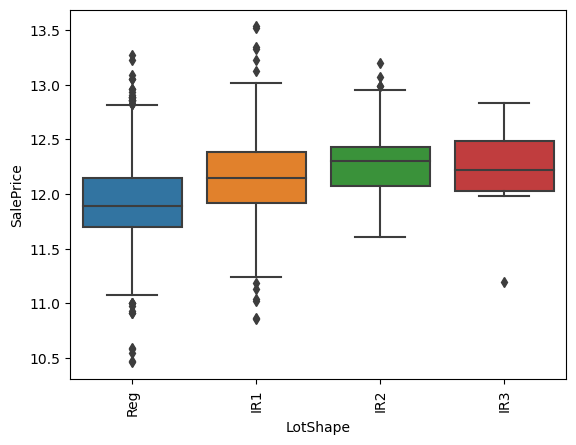

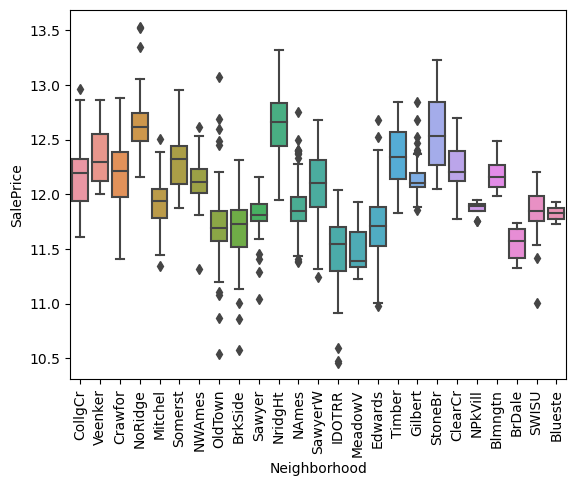

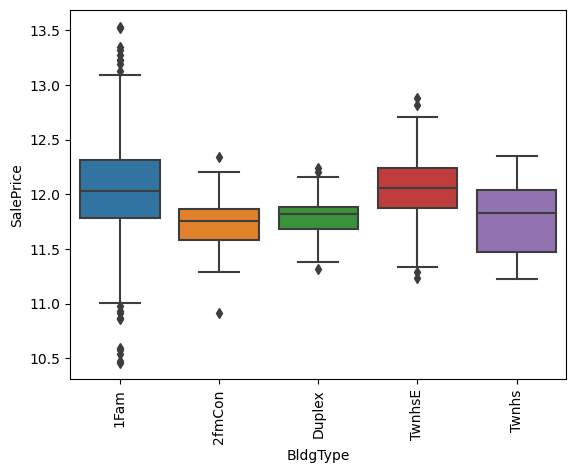

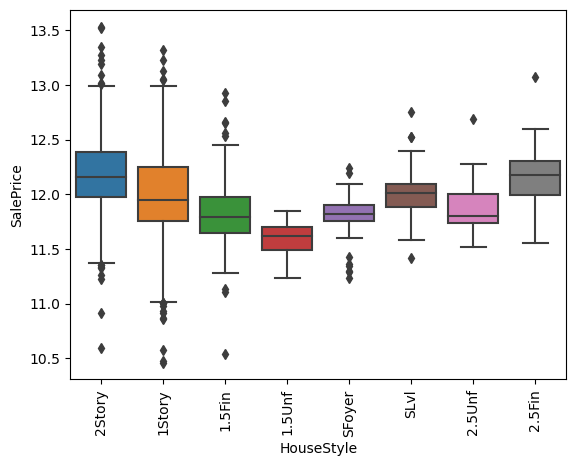

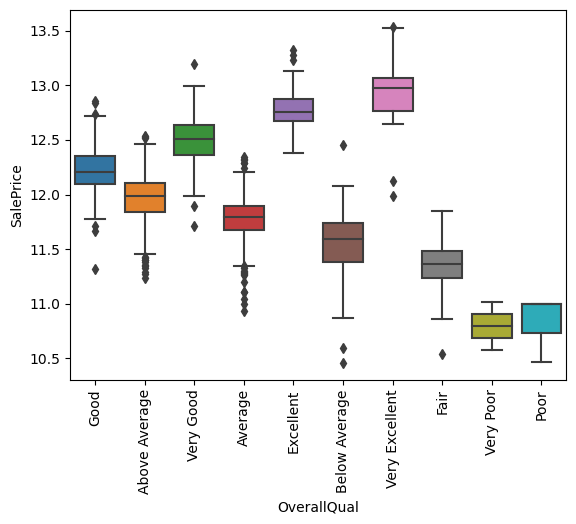

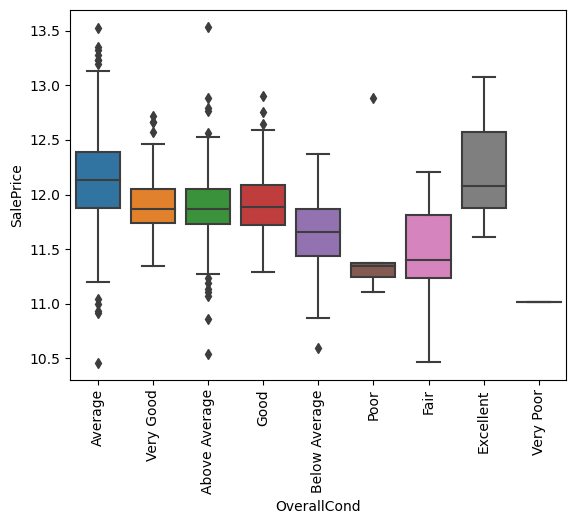

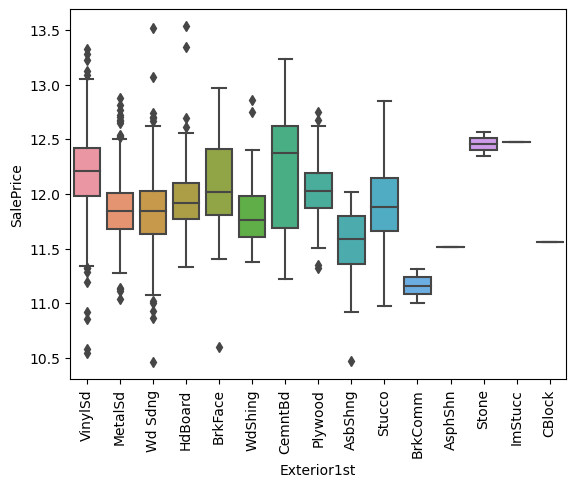

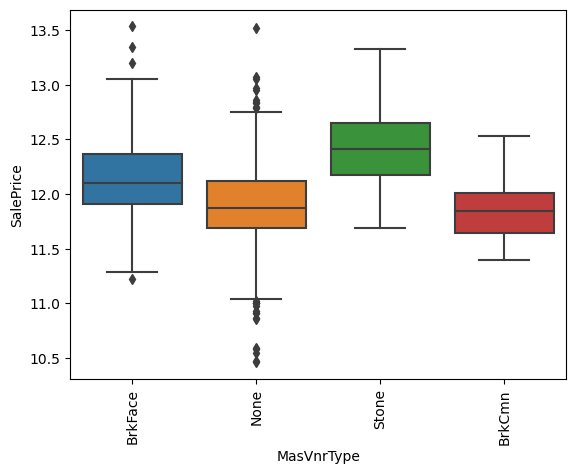

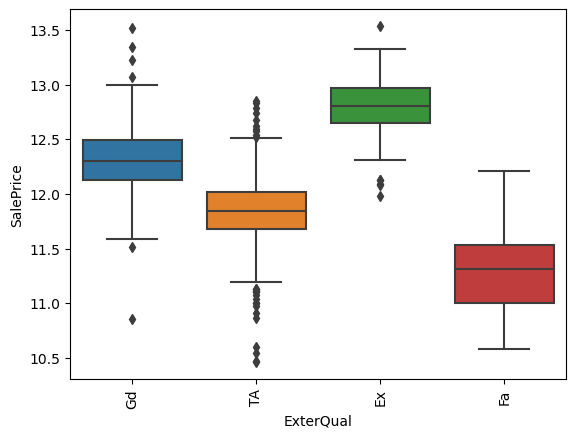

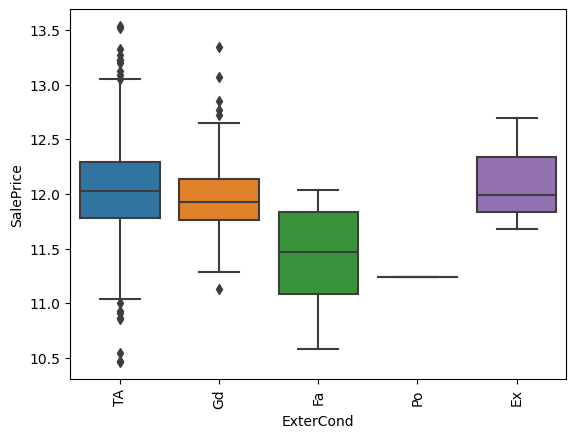

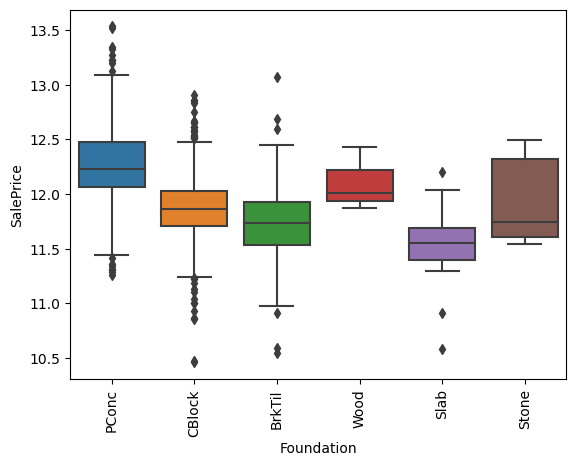

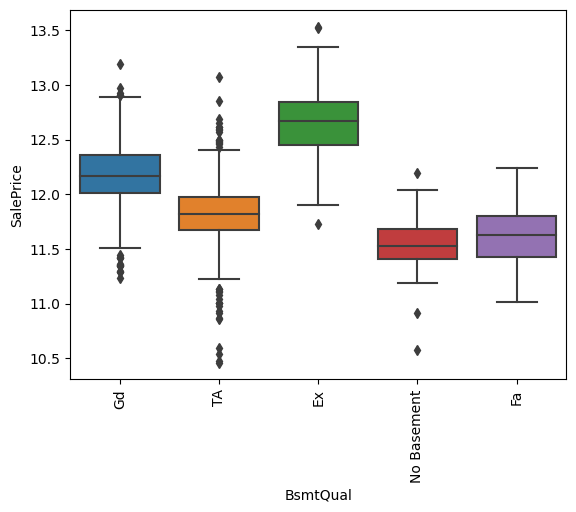

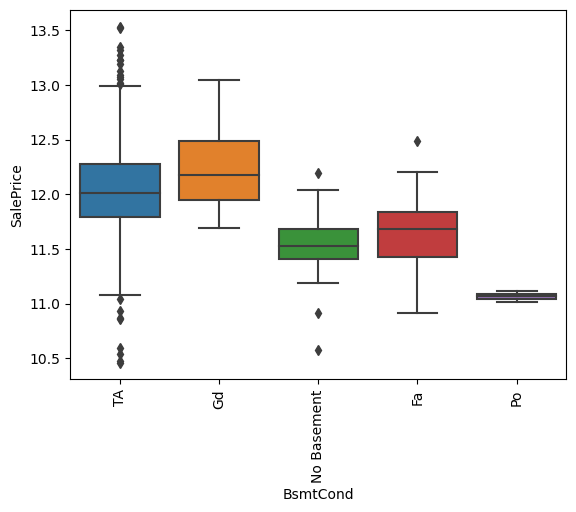

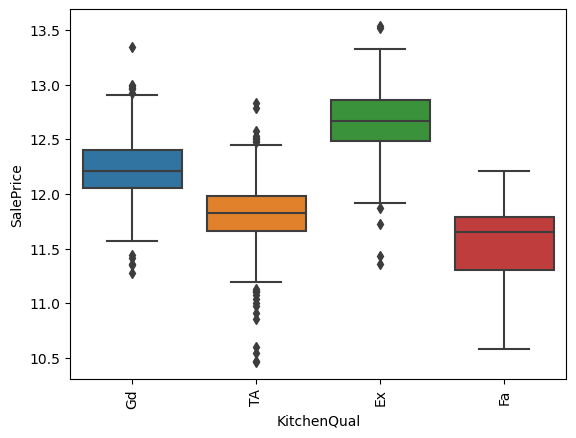

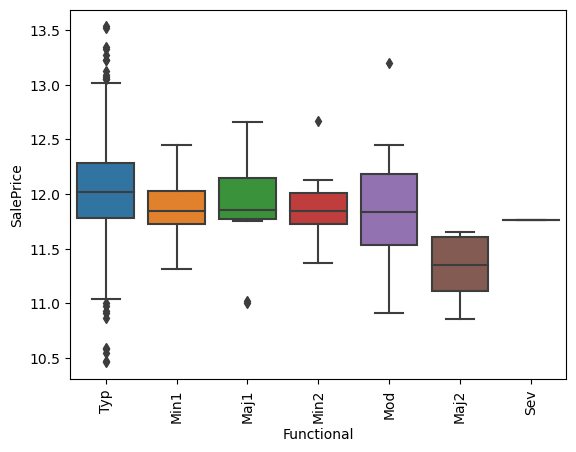

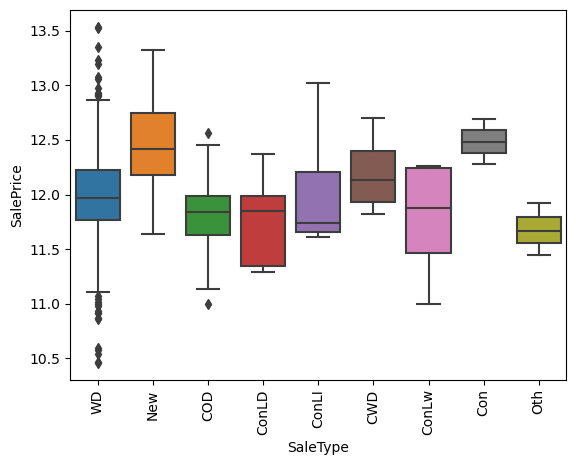

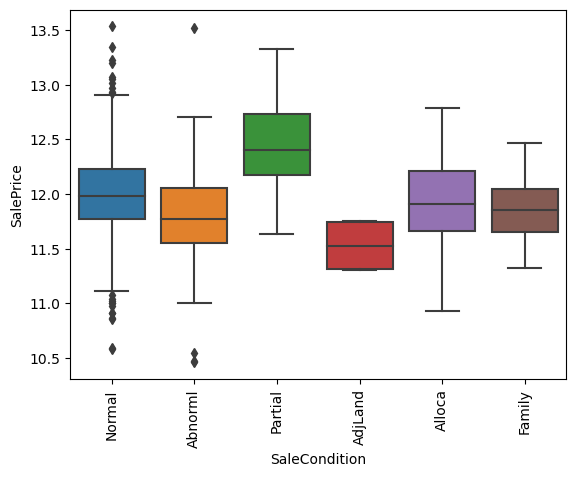

In [42]:
for column in categorical_columns_filtered:
    sns.boxplot(x=df[column],y=df["SalePrice"])
    plt.xticks(rotation=90)
    plt.show()
    

<font color="Green">Observation</font>
1. Residential Low Density and Floating Village Residential Zones are getting sold for higher price
2. Home Sold in neighborhood Nridght,Noridge,StoneBar getting sold at higher prices
3. Kitchen Quality, basement quality,  Exterior Quality and Overall is Excellent are getting sold at the higher prices
4. New Homes getting Sold at the higher Price, partially completed homes during sales getting sold for higher prices
5. OverAll Condition average is having almost same price as excellet condition, So if the company can get Average condition home for cheaper price they can flip and make more profit

## Data Preparation

### Creating Dummy Variables

In [43]:
# creating dummies for categorical variable which is non binary
# drop_first= True makes sure n-1 dummy variable creation
dummies_df = pd.get_dummies(df[categorical_columns], drop_first = True)
df = pd.concat([df, dummies_df], axis = 1)
df.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=282)

In [44]:
# droping Original columns
df.drop(categorical_columns, axis = 1, inplace = True)

In [45]:
for column in df.columns:
    print(column)

MSSubClass
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
SalePrice
BuildingAge
GarageYrAge
ModifiedLastedYrs
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Alley_No alley access
Alley_Pave
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighborhood_NPkVill
Neighborhood_NWAmes
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_OldTown
Neighborhood_SWISU
Neighborhoo

1. BsmtQual_No Basement,BsmtCond_No Basement,BsmtExposure_No Basement,BsmtFinType1_No Basement,BsmtFinType2_No Basement
2. GarageType_No Garage,GarageFinish_No Garage,GarageQual_No Garage,GarageCond_No Garage
these dummy variables are means same thing we can keep one drop remaining everything

In [46]:
df.drop(['BsmtCond_No Basement','BsmtExposure_No Basement','BsmtFinType1_No Basement','BsmtFinType2_No Basement',
        'GarageFinish_No Garage','GarageQual_No Garage','GarageCond_No Garage'], axis = 1, inplace = True)

In [47]:
df.columns

Index(['MSSubClass', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=237)

### Test Train Split

In [48]:
#using 70% training data and 30% test data
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Scaling features

In [49]:
#scaling numerical variable with standardization
scaler = StandardScaler()
df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])

#split target and features
y_train = df_train.pop('SalePrice') #removing column SalePrice from df_train
X_train = df_train

In [50]:
df_train.head()

,MSSubClass,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
984,0.787494,-0.049244,-0.555867,-0.931228,-0.299629,-1.265589,-2.274081,0.320038,0.206085,-0.123208,...,0,0,0,0,0,0,0,0,1,0
1416,3.177599,0.067048,-0.555867,-0.931228,-0.299629,0.464070,-0.607802,0.179679,1.610886,-0.123208,...,0,0,0,0,1,0,0,0,1,0
390,-0.168548,-0.213872,-0.555867,-0.422211,1.997881,-0.755819,-0.427663,-0.534650,0.146404,-0.123208,...,0,0,0,0,1,0,0,0,1,0
877,0.070462,-0.172811,0.591698,1.539931,-0.299629,-0.615576,0.861183,0.721065,0.963575,-0.123208,...,0,0,0,0,1,0,0,0,1,0
567,-0.885580,-0.044841,0.336684,-0.927003,-0.299629,2.106912,0.979131,0.904033,-0.785539,-0.123208,...,0,0,0,0,1,0,0,0,1,0


### Test Data Prepartion

In [51]:
df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])
#preparing test data for prediction
y_test = df_test.pop('SalePrice') #removing column SalePrice from df_test
X_test = df_test

## Model Building

### Simple Linear Fit and Co-efficient Calculation

In [52]:
#creating simple linear Regression and observing its performance
lm = LinearRegression()
# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [53]:
print(lm.intercept_)
print(lm.coef_)

-0.47257113456725797
[-2.87369969e-02  5.47990576e-02 -9.48974118e-03  2.41489977e+11
  8.68026867e+10  2.29125952e+11 -2.37841238e+11  6.58112826e+10
  7.18604941e+10  7.81903855e+09 -8.73622655e+10  6.16874695e-02
  7.59315491e-03  4.63562012e-02  2.22988129e-02  2.87475586e-02
 -3.61328125e-02  2.92053223e-02 -1.01470947e-02  1.16256714e-01
  9.75799561e-03  3.26499939e-02  1.21307373e-03  1.95999146e-02
  2.15835571e-02  2.52075195e-02 -4.29534912e-02  3.91769409e-03
 -8.59832764e-02  4.04815674e-02 -4.65087891e-02  1.23674774e+00
  1.28758597e+00  1.16083527e+00  1.10771942e+00  6.12239838e-02
  1.26045227e-01  4.47322130e-02 -3.48434567e-01  3.08647156e-02
  2.56647110e-01  3.55223894e-01  2.24745750e-01  8.62903595e-02
 -1.21221542e-01 -4.13282394e-01 -3.39775085e-02 -8.09812546e-03
 -2.56617069e-01 -1.53239727e-01 -1.42410278e-01  3.10897827e-02
  2.10783362e-01  6.16798401e-02  4.40376282e-01 -1.77967072e-01
  7.54623413e-02 -7.98130035e-02 -4.75917816e-01 -5.07297516e-02
 -8.

In [54]:
def pack_columns_betas_into_df(columns,betas,intercept):
    columns.insert(0, "constant")
    betas.insert(0,intercept)
    betas_df = pd.DataFrame(list(zip(columns, betas)))
    betas_df.columns = ['Feature', 'Beta']
    return betas_df

# Print the coefficients and intercept
lm_beta_df = pack_columns_betas_into_df(X_train.columns,list(lm.coef_),lm.intercept_)
lm_beta_df = lm_beta_df.sort_values(by=['Beta'], ascending = False,key=abs)
lm_beta_df.head(15)

,Feature,Beta
4,BsmtFinSF2,2.414900e+11
7,1stFlrSF,-2.378412e+11
6,TotalBsmtSF,2.291260e+11
11,BsmtFullBath,-8.736227e+10
5,BsmtUnfSF,8.680269e+10
9,LowQualFinSF,7.186049e+10
8,2ndFlrSF,6.581128e+10
10,GrLivArea,7.819039e+09
216,GarageCond_TA,-7.591160e+09
214,GarageCond_Gd,-7.591160e+09


Above table gives us the top predictor using the linear regression

In [55]:
def calculate_metrics(y_train, y_pred_train,y_test, y_pred_test):
    metrics =[]
    #r2 calculation
    r2_train = r2_score(y_train, y_pred_train)
    print('r2_train :')
    print(r2_train)
    metrics.append(r2_train)

    r2_test = r2_score(y_test, y_pred_test)
    print('r2_test :')
    print( r2_test)
    metrics.append(r2_test)

    rss_train = np.sum(np.square(y_train - y_pred_train))
    print('rss_train :')
    print(rss_train)
    metrics.append(rss_train)

    rss_test = np.sum(np.square(y_test - y_pred_test))
    print('rss_test :')
    print(rss_test)
    metrics.append(rss_test)

    mse_train= mean_squared_error(y_train, y_pred_train)
    print('mse_train :')
    print(mse_train)
    metrics.append(rss_test)

    mse_test = mean_squared_error(y_test, y_pred_test)
    print('mse_test :')
    print(mse_test)
    metrics.append(mse_test)
    
    return metrics

#prediction on the training data set
y_pred_train = lm.predict(X_train)
#prediction on the test data set
y_pred_test = lm.predict(X_test)
#calculating the metrics on the prediction
lr_metrics = calculate_metrics(y_train, y_pred_train,y_test, y_pred_test)



r2_train :
0.9353249104132682
r2_test :
-3.926914412961719e+17
rss_train :
66.03326646805316
rss_test :
1.584587005731341e+20
mse_train :
0.0646750895867318
mse_test :
3.6177785518980384e+17


<font color='green'>Observation</font> 
  1. we can see that Linear Regression Model having good r2 on the train data set but on test it is dropped heavily this is because of the complexity of the model and overfitting
  2. We can regularization techniques to get Optimal Model using ridge regression and lasso regression

## Ridge Regression

In [56]:
# list of alphas to tune 
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_ridge.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

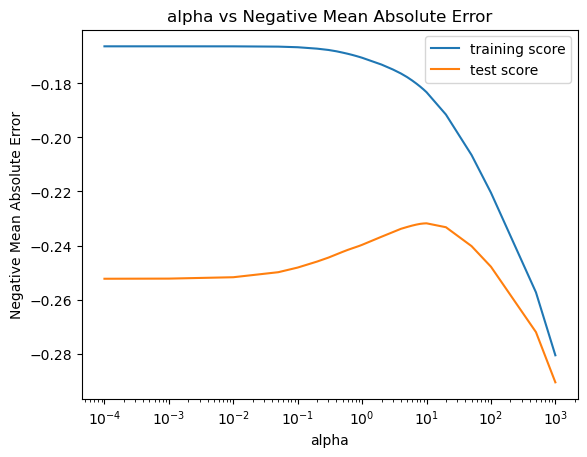

In [57]:
def plot_cv_results(model_cv):
    cv_results = pd.DataFrame(model_cv.cv_results_)
    cv_results.head()
    plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
    plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
    plt.xlabel('alpha')
    plt.ylabel('Negative Mean Absolute Error')
    plt.xscale('log')
    plt.title("alpha vs Negative Mean Absolute Error")
    plt.legend(['training score', 'test score'], loc='upper right')
    plt.show()

#ridge alpha plot
plot_cv_results(model_cv_ridge)   
    

When alpha value is Zero it doesn't regularize so test performance will be bad due to overfittig

When alpha value is very high it will cause underfitting, model being too simple so test performance will bad

So when we move alpha from 0 to max it will slowly reduce test error once optimal point crossed it will starts to increase

We can observe the same pattern in above graph we can see exactly at 10 NMAE starts to increase

we can choose 10 as optimal alpha

In [58]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-4.94240784e-02  4.43841503e-02 -1.78455232e-03  1.10562207e-02
  2.14525535e-02  1.95625622e-02  3.79008978e-02  7.87488102e-02
  1.34257336e-01  1.04890458e-03  1.69850908e-01  6.52879838e-02
  1.03362226e-02  6.47146671e-02  3.01861164e-02  1.73772823e-02
 -4.14725026e-02  4.07062699e-02  1.88247027e-02  1.04076707e-01
  1.30666888e-02  3.51499996e-02 -1.64773028e-03  2.36819327e-02
  1.38059127e-02  2.76116704e-02 -6.06379331e-02  4.54052236e-03
 -9.71029572e-02  2.69867985e-02 -6.74709509e-02  1.53981654e-01
  1.30563019e-01  1.61957721e-01  7.76648457e-02  1.03038887e-02
  9.32401427e-02  4.27781731e-02 -1.41751298e-01  1.52033115e-02
  1.17500553e-01  8.14634793e-02  9.38154126e-02  8.52783094e-02
 -5.94571244e-02 -4.69806182e-02 -3.08173930e-02  1.87356299e-02
 -6.24148207e-02 -8.28715870e-03 -4.97797897e-02  3.40889567e-02
  1.20655450e-01 -2.25173181e-02  2.70468026e-01 -2.06744198e-01
 -6.53998005e-02 -2.03454063e-01 -1.91036732e-01 -7.55317617e-02
 -1.48455781e-02 -1.38997

In [59]:
# Print the coefficients and intercept
print(ridge.intercept_)
ridge_beta_df = pack_columns_betas_into_df(X_train.columns,list(ridge.coef_),ridge.intercept_)
ridge_beta_df.head(30)

-0.6009456578471508


,Feature,Beta
0,MSSubClass,-0.600946
1,LotArea,-0.049424
2,MasVnrArea,0.044384
3,BsmtFinSF1,-0.001785
4,BsmtFinSF2,0.011056
5,BsmtUnfSF,0.021453
6,TotalBsmtSF,0.019563
7,1stFlrSF,0.037901
8,2ndFlrSF,0.078749
9,LowQualFinSF,0.134257


In [60]:
#prediction on the training data set
y_pred_train = ridge.predict(X_train)
#prediction on the test data set
y_pred_test = ridge.predict(X_test)

ridge_metrics = calculate_metrics(y_train, y_pred_train,y_test, y_pred_test)

r2_train :
0.9197517497893386
r2_test :
0.8626830273746893
rss_train :
81.9334634650853
rss_test :
55.410092404923205
mse_train :
0.08024825021066141
mse_test :
0.1265070602852128


r2 is stable between test and train and MSE also less compared to simple linear fit

## Lasso Regression

In [61]:
#ridge regression keeps all the features, We can use lasso regression to make feature selection as well
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

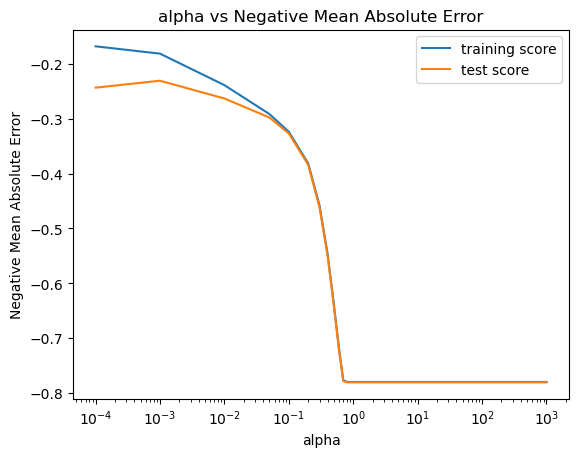

In [62]:
#lasso alpha calculation
#inorder to find the optimal alpha we need to plot alpha againt the negative mean absolute error
plot_cv_results(model_cv) 

When alpha value is Zero it doesn't regularize so test performance will be bad due to overfittig

When alpha value is very high it will cause underfitting, model being too simple so test performance will bad

So when we move alpha from 0 to max it will slowly reduce test error once optimal point crossed it will starts to increase

We can observe the same pattern in above graph we can see exactly at 0.001 NMAE starts to increase

we can choose 0.001 as optimal alpha

In [63]:
alpha_l =0.001

lasso = Lasso(alpha=alpha_l)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [64]:
lasso.coef_

array([-4.90761916e-02,  4.17841460e-02, -0.00000000e+00, -0.00000000e+00,
        6.95328487e-03,  7.02795387e-03,  3.89172594e-02,  0.00000000e+00,
        3.96877292e-02, -7.77760712e-03,  2.81920359e-01,  6.90035025e-02,
        1.11179104e-02,  6.23420885e-02,  2.69983004e-02,  2.02895681e-02,
       -3.41634388e-02,  3.44342054e-02,  1.03247152e-02,  1.00440099e-01,
        1.23836075e-02,  3.41213792e-02, -0.00000000e+00,  2.10427199e-02,
        1.12014737e-02,  2.79908821e-02, -5.52382970e-02,  2.45186582e-03,
       -1.08053838e-01,  2.44067298e-02, -6.36248894e-02,  2.71808401e-01,
        2.79415976e-01,  2.67401212e-01,  2.03585236e-01,  0.00000000e+00,
        6.56815651e-02,  2.04231415e-02, -2.02785291e-01,  2.06268685e-02,
        9.26128528e-02,  6.49098051e-02,  9.47589131e-02,  8.94079115e-02,
       -1.84477352e-02, -0.00000000e+00, -2.37045232e-02,  0.00000000e+00,
       -1.40525370e-02, -0.00000000e+00, -0.00000000e+00,  8.22023802e-03,
        1.85935005e-01,  

In [65]:
# Print the coefficients and intercept
print(lasso.intercept_)
lasso_beta_df = pack_columns_betas_into_df(X_train.columns,list(lasso.coef_),lasso.intercept_)
lasso_beta_df.head(40)

-0.7392282982882057


,Feature,Beta
0,MSSubClass,-0.739228
1,LotArea,-0.049076
2,MasVnrArea,0.041784
3,BsmtFinSF1,-0.000000
4,BsmtFinSF2,-0.000000
5,BsmtUnfSF,0.006953
6,TotalBsmtSF,0.007028
7,1stFlrSF,0.038917
8,2ndFlrSF,0.000000
9,LowQualFinSF,0.039688


In [66]:
#prediction on the training data set
y_pred_train_l = lasso.predict(X_train)
#prediction on the test data set
y_pred_test_l = lasso.predict(X_test)

lasso_metrics = calculate_metrics(y_train, y_pred_train_l,y_test, y_pred_test_l)

r2_train :
0.9212937225452481
r2_test :
0.8664946596641471
rss_train :
80.3591092813017
rss_test :
53.87202399768602
mse_train :
0.07870627745475191
mse_test :
0.12299548857919183


r2 is stable between test and train and MSE also less compared to simple linear fit

## Model Evaluation

### Metric Comparison

In [67]:
# Creating a table which contain all the metrics
def create_metric_comparison_df(lr_metrics,ridge_metrics,lasso_metrics):
    lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                           'MSE (Train)','MSE (Test)'], 
            'Linear Regression': lr_metrics
            }

    lr_metric_df = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

    ridge_metric_df = pd.Series(ridge_metrics, name = 'Ridge Regression')
    lasso_metric_df = pd.Series(lasso_metrics, name = 'Lasso Regression')

    final_metrics = pd.concat([lr_metric_df,ridge_metric_df,lasso_metric_df ], axis = 1)

    return final_metrics

create_metric_comparison_df(lr_metrics,ridge_metrics,lasso_metrics)

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.353249e-01,0.919752,0.921294
1,R2 Score (Test),-3.926914e+17,0.862683,0.866495
2,RSS (Train),6.603327e+01,81.933463,80.359109
3,RSS (Test),1.584587e+20,55.410092,53.872024
4,MSE (Train),1.584587e+20,55.410092,53.872024
5,MSE (Test),3.617779e+17,0.126507,0.122995


1. Lasso seems to have better r2 and MSE
2. with lasso we also have addition feature selection

### Model co-efficients Comparison

In [68]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas

,Linear,Ridge,Lasso
MSSubClass,-2.873700e-02,-0.049424,-0.049076
LotArea,5.479906e-02,0.044384,0.041784
MasVnrArea,-9.489741e-03,-0.001785,-0.000000
BsmtFinSF1,2.414900e+11,0.011056,-0.000000
BsmtFinSF2,8.680269e+10,0.021453,0.006953
BsmtUnfSF,2.291260e+11,0.019563,0.007028
TotalBsmtSF,-2.378412e+11,0.037901,0.038917
1stFlrSF,6.581128e+10,0.078749,0.000000
2ndFlrSF,7.186049e+10,0.134257,0.039688
LowQualFinSF,7.819039e+09,0.001049,-0.007778


### Ridge Top Predictors

In [69]:
ridge_beta_df=ridge_beta_df.sort_values(by=['Beta'], ascending = False,key=abs)
ridge_beta_df.head(15)

,Feature,Beta
0,MSSubClass,-0.600946
105,OverallCond_Good,-0.329487
95,OverallQual_Fair,0.316185
55,Neighborhood_Edwards,0.270468
65,Neighborhood_OldTown,0.225742
56,Neighborhood_Gilbert,-0.206744
100,OverallQual_Very Poor,0.206277
58,Neighborhood_MeadowV,-0.203454
59,Neighborhood_Mitchel,-0.191037
98,OverallQual_Very Excellent,-0.190930


### Lasso Top Predictors

In [70]:
lasso_beta_df=lasso_beta_df.sort_values(by=['Beta'], ascending = False,key=abs)
lasso_beta_df.head(15)

,Feature,Beta
0,MSSubClass,-0.739228
105,OverallCond_Good,-0.516687
95,OverallQual_Fair,0.495732
98,OverallQual_Very Excellent,-0.397536
55,Neighborhood_Edwards,0.350938
59,Neighborhood_Mitchel,-0.340520
11,BsmtFullBath,0.281920
33,MSZoning_RL,0.279416
32,MSZoning_RH,0.271808
65,Neighborhood_OldTown,0.270485


In [71]:
print(lasso_beta_df.shape)

(236, 2)


### Lasso Traning Dataset residual Analysis

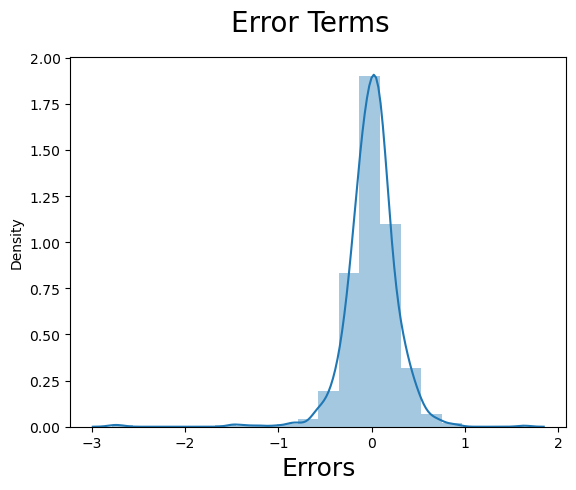

In [72]:
def plot_Error_Terms(y_actual,y_pred):
    fig = plt.figure()
    sns.distplot((y_actual - y_pred), bins = 20)
    fig.suptitle('Error Terms', fontsize = 20)
    plt.xlabel('Errors', fontsize = 18)

plot_Error_Terms(y_train,y_pred_train_l)

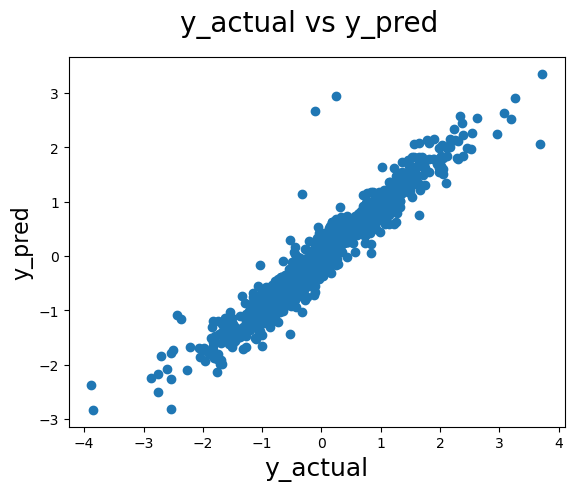

In [73]:
def plot_actual_and_pred(y_actaul,y_pred):
    fig = plt.figure()
    plt.scatter(y_actaul,y_pred)
    fig.suptitle('y_actual vs y_pred', fontsize=20)             
    plt.xlabel('y_actual', fontsize=18)                         
    plt.ylabel('y_pred', fontsize=16)
plot_actual_and_pred(y_train,y_pred_train_l)

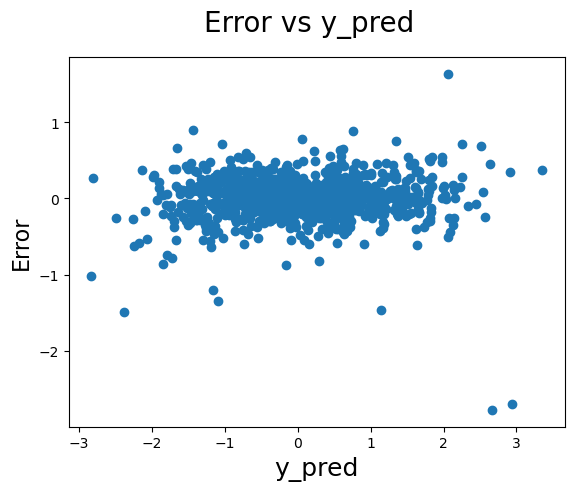

In [74]:
def plot_error_and_pred(y_actual,y_pred):
    fig = plt.figure()
    plt.scatter(y_pred,(y_actual-y_pred))
    fig.suptitle('Error vs y_pred', fontsize=20)             
    plt.xlabel('y_pred', fontsize=18)                         
    plt.ylabel('Error', fontsize=16)
plot_error_and_pred(y_train,y_pred_train_l)

Linear Regression Assumption are met
1. Linear Relationship between target variable and predictor variable is present which we can obserserve correlation matrix and pairplot during data exploration
2. Error Terms are normally distributed
3. Error having constant variance
4. there is no visible patterns on error term plot

### Lasso Test Dataset residual Analysis

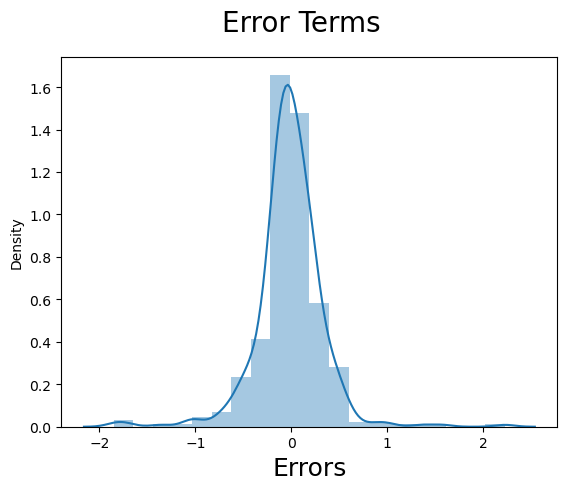

In [75]:
plot_Error_Terms(y_test,y_pred_test_l)

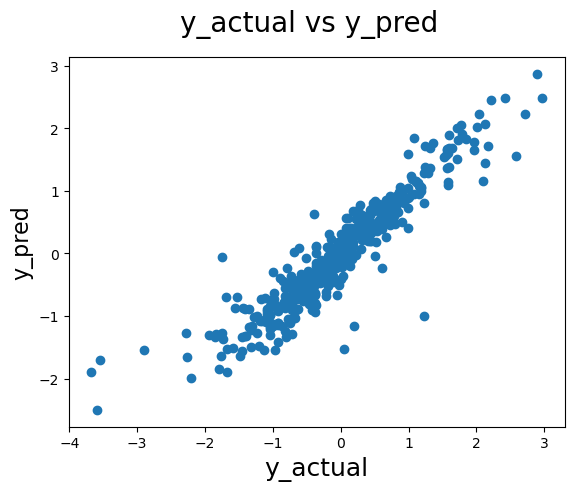

In [76]:
plot_actual_and_pred(y_test,y_pred_test_l)

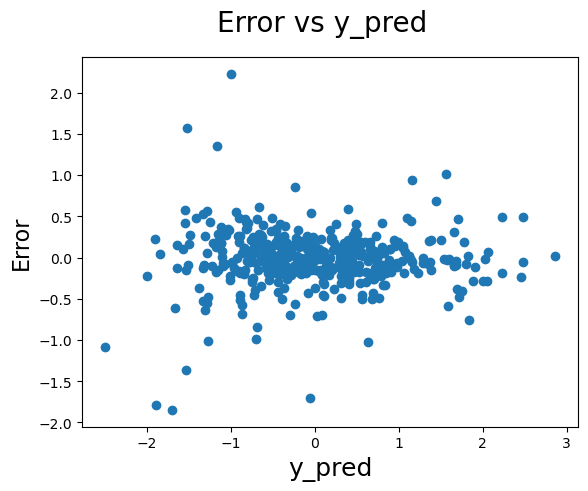

In [77]:
plot_error_and_pred(y_test,y_pred_test_l)

Linear Regression Assumption are met
1. Linear Relationship between target variable and predictor variable is present which we can obserserve correlation matrix and pairplot during data exploration
2. Error Terms are normally distributed
3. Error having constant variance
4. there is no visible patterns on error term plot

## Conclusion

When we are choosing the right model, we can use model selection principle

1. Keep Model Simple but not too naïve
2. Strike the balance between Bias vs Variance
3. The model with Lesser RMSE

First two points can be achieved by regularization done by both ridge and lasso. Lasso having one additional advantage of feature selection. As the business objective is to identify the variables influence the price. we can choose lasso for this assignment. But if there is a business need to keep all features then we can go with ridge.

On third point we can see infer from model metric comparison lasso performs better on all category
 
We will Choose model below are the top predictor variables

In [78]:
lasso_beta_df=lasso_beta_df.sort_values(by=['Beta'], ascending = False,key=abs)
lasso_beta_df.head(15)

,Feature,Beta
0,MSSubClass,-0.739228
105,OverallCond_Good,-0.516687
95,OverallQual_Fair,0.495732
98,OverallQual_Very Excellent,-0.397536
55,Neighborhood_Edwards,0.350938
59,Neighborhood_Mitchel,-0.340520
11,BsmtFullBath,0.281920
33,MSZoning_RL,0.279416
32,MSZoning_RH,0.271808
65,Neighborhood_OldTown,0.270485


### Subjective question checks

### Alpha Double Check

In [79]:
alpha_r2 =20
ridge_double_alpha = Ridge(alpha=alpha_r2)        
ridge_double_alpha.fit(X_train, y_train)
ridge_double_beta_df = pack_columns_betas_into_df(X_train.columns,list(ridge_double_alpha.coef_),ridge_double_alpha.intercept_)
#prediction on the training data set
y_pred_train_r2a = ridge_double_alpha.predict(X_train)
#prediction on the test data set
y_pred_test_r2a = ridge_double_alpha.predict(X_test)
ridge_double_alpha_metrics = calculate_metrics(y_train, y_pred_train_r2a,y_test, y_pred_test_r2a)
ridge_double_beta_df=ridge_double_beta_df.sort_values(by=['Beta'], ascending = False,key=abs)
ridge_double_beta_df.head(15)

r2_train :
0.9120254378280883
r2_test :
0.8562438312535153
rss_train :
89.82202797752177
rss_test :
58.00843436707264
mse_train :
0.08797456217191163
mse_test :
0.13243934787002887


,Feature,Beta
0,MSSubClass,-0.546570
105,OverallCond_Good,-0.243018
95,OverallQual_Fair,0.242213
55,Neighborhood_Edwards,0.215544
65,Neighborhood_OldTown,0.187536
56,Neighborhood_Gilbert,-0.187337
100,OverallQual_Very Poor,0.173940
11,BsmtFullBath,0.164608
58,Neighborhood_MeadowV,-0.153622
196,FireplaceQu_Fa,0.152376


In [80]:
alpha_l2 =0.002
lasso_double_alpha = Lasso(alpha=alpha_l2)        
lasso_double_alpha.fit(X_train, y_train)
lasso_double_beta_df = pack_columns_betas_into_df(X_train.columns,list(lasso_double_alpha.coef_),lasso_double_alpha.intercept_)
#prediction on the training data set
y_pred_train_l2a = lasso_double_alpha.predict(X_train)
#prediction on the test data set
y_pred_test_l2a = lasso_double_alpha.predict(X_test)
lasso_double_alpha_metrics = calculate_metrics(y_train, y_pred_train_l2a,y_test, y_pred_test_l2a)
lasso_double_beta_df=lasso_double_beta_df.sort_values(by=['Beta'], ascending = False,key=abs)
lasso_double_beta_df.head(15)

r2_train :
0.910552388213012
r2_test :
0.8578443722282219
rss_train :
91.32601163451477
rss_test :
57.36258468359364
mse_train :
0.08944761178698803
mse_test :
0.13096480521368412


,Feature,Beta
0,MSSubClass,-0.570741
105,OverallCond_Good,-0.502002
95,OverallQual_Fair,0.448749
55,Neighborhood_Edwards,0.317140
11,BsmtFullBath,0.286159
59,Neighborhood_Mitchel,-0.253294
65,Neighborhood_OldTown,0.252355
100,OverallQual_Very Poor,0.240720
58,Neighborhood_MeadowV,-0.233920
117,Exterior1st_CBlock,0.194648


In [81]:
print(lasso_double_beta_df.shape)

(236, 2)


In [82]:
create_metric_comparison_df(lr_metrics,ridge_double_alpha_metrics,lasso_double_alpha_metrics)

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.353249e-01,0.912025,0.910552
1,R2 Score (Test),-3.926914e+17,0.856244,0.857844
2,RSS (Train),6.603327e+01,89.822028,91.326012
3,RSS (Test),1.584587e+20,58.008434,57.362585
4,MSE (Train),1.584587e+20,58.008434,57.362585
5,MSE (Test),3.617779e+17,0.132439,0.130965


### Lasso Drop Re Model without top five predictors

In [83]:
top_predictors_to_drop = ['MSSubClass','OverallCond_Good','OverallQual_Fair','OverallQual_Very Excellent','Neighborhood_Edwards']
X_test_2 = X_test
X_train_2 = X_train
X_train_2 = X_train_2.drop(top_predictors_to_drop,axis=1)
X_test_2 = X_test_2.drop(top_predictors_to_drop,axis=1)
lasso_2 = Lasso(alpha=0.001)        
lasso_2.fit(X_train_2, y_train)
lasso_2_beta_df = pack_columns_betas_into_df(X_train_2.columns,list(lasso_2.coef_),lasso_2.intercept_)
#prediction on the training data set
y_pred_train_l2 = lasso_2.predict(X_train_2)
#prediction on the test data set
y_pred_test_l2 = lasso_2.predict(X_test_2)
lasso_l2_metrics = calculate_metrics(y_train, y_pred_train_l2,y_test, y_pred_test_l2)
lasso_2_beta_df=lasso_2_beta_df.sort_values(by=['Beta'], ascending = False,key=abs)
lasso_2_beta_df.head(15)

r2_train :
0.9188130383150787
r2_test :
0.8650513458312732
rss_train :
82.89188788030467
rss_test :
54.45442944487762
mse_train :
0.08118696168492132
mse_test :
0.12432518138099913


,Feature,Beta
0,LotArea,-0.767325
101,OverallCond_Poor,-0.593140
93,OverallQual_Good,0.433092
54,Neighborhood_Gilbert,0.401882
32,MSZoning_RL,0.328118
63,Neighborhood_OldTown,0.321325
57,Neighborhood_Mitchel,-0.313492
95,OverallQual_Very Good,-0.297783
10,BsmtFullBath,0.285255
31,MSZoning_RH,0.274403
